In [1]:
import os
os.chdir('../')

from visualization import Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
project = 'rehersal Alexnet CIFAR10 Task IL CL v3'

UID=['rehearsal_dataset', 'batch_size_rehearsal', 'dataset', 'classes_per_task', 'contrastive_epochs', 'epochs']
viz = Visualization(project=project, UID=UID)

In [3]:
viz.extract_all_runs_metrics()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[4]} {uid.split(';')[5]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    # plt.title(f"metric: {metric_name}", fontsize=fontsize)
    # plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

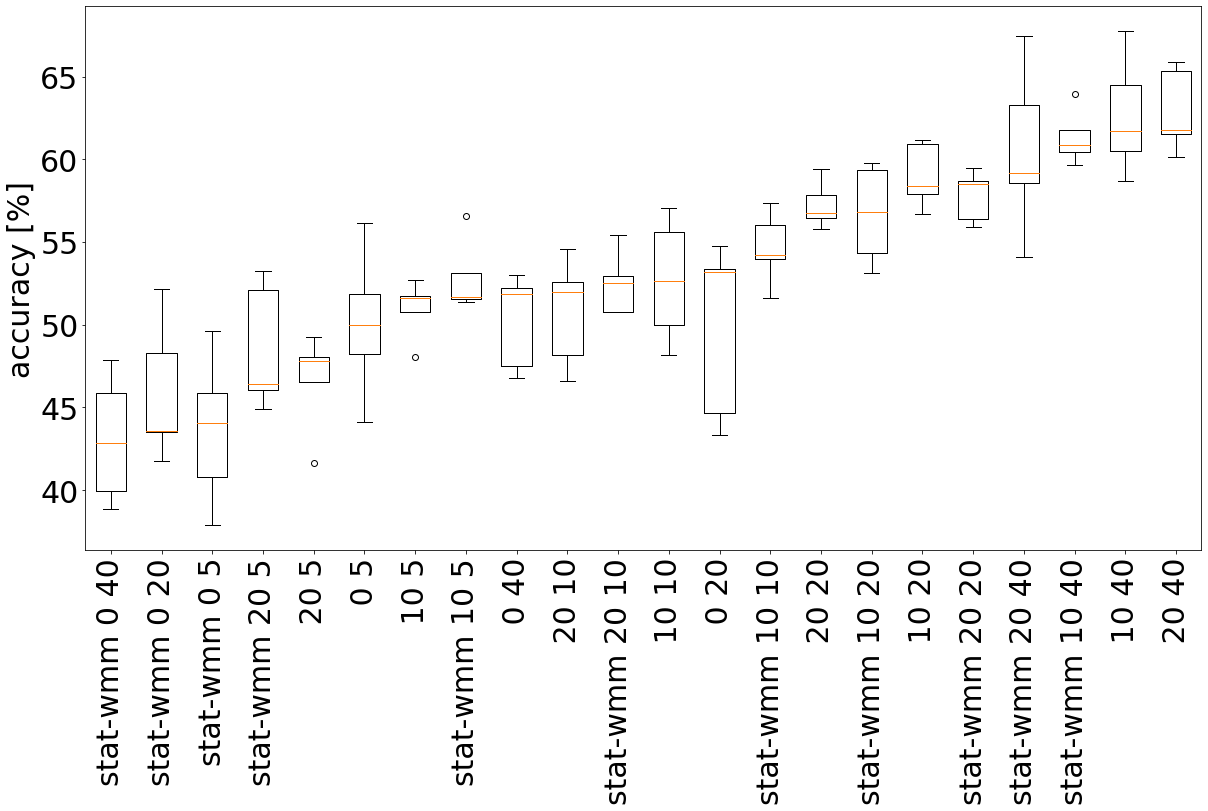

In [5]:
df = viz.metrics_df

# df = df[df['dataset'] == 'CIFAR10']
df = df[df['dataset'] == 'CIFAR100']

metric = 'mean_acc_at_the_end'
# metric = 'mean_acc_max'
# metric = 'mean_acc_mean_decrease_per_task'
# metric = 'acc_at_the_end_task_0'

box_plot(metric, df, f"Con_loss_alexnet_{metric}", fontsize=30)
# box_plot(metric, df, None, fontsize=30)

In [6]:
viz.df.value_counts('UID')

UID
;128;CIFAR100;5;0;5;              10
;128;CIFAR100;5;10;10;            10
stat-wmm;128;CIFAR100;5;0;5;      10
stat-wmm;128;CIFAR100;5;10;10;     9
;128;CIFAR100;5;0;20;              5
stat-wmm;128;CIFAR100;5;0;40;      5
stat-wmm;128;CIFAR100;5;20;5;      5
stat-wmm;128;CIFAR100;5;20;40;     5
stat-wmm;128;CIFAR100;5;20;20;     5
stat-wmm;128;CIFAR100;5;20;10;     5
stat-wmm;128;CIFAR100;5;10;5;      5
stat-wmm;128;CIFAR100;5;10;40;     5
stat-wmm;128;CIFAR100;5;10;20;     5
stat-wmm;128;CIFAR100;5;0;20;      5
;128;CIFAR100;5;0;40;              5
;128;CIFAR10;2;10;5;               5
;128;CIFAR100;5;20;5;              5
;128;CIFAR100;5;20;40;             5
;128;CIFAR100;5;20;20;             5
;128;CIFAR100;5;20;10;             5
;128;CIFAR100;5;10;5;              5
;128;CIFAR100;5;10;40;             5
;128;CIFAR100;5;10;20;             5
stat-wmm;128;CIFAR10;2;10;5;       5
dtype: int64

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           54.08 &     53.75 &               0.98 &  test \\
    1 &           59.00 &     59.28 &               1.28 &  test \\
    2 &           51.88 &     52.80 &               1.60 &  test \\
    3 &           62.80 &     61.43 &               3.08 &  test \\
    4 &           58.56 &     58.60 &               0.00 &  test \\
\bottomrule
\end{tabular}



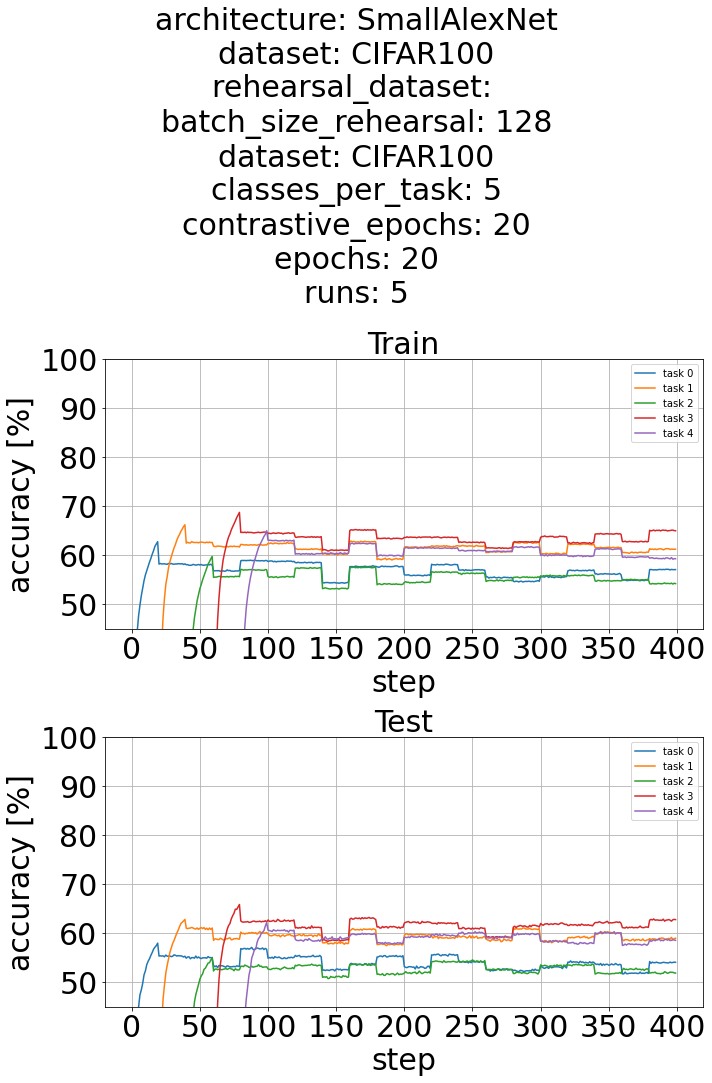

In [7]:
viz.plot_single_setting_aggregated(";128;CIFAR100;5;20;20", layout='vertical_short', filename="contrastive_1", fontsize=30)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           58.60 &     58.27 &               1.01 &  test \\
    1 &           51.92 &     54.06 &               2.43 &  test \\
    2 &           61.04 &     60.81 &               2.02 &  test \\
    3 &           59.48 &     57.29 &               2.32 &  test \\
    4 &           58.00 &     56.98 &               0.00 &  test \\
\bottomrule
\end{tabular}



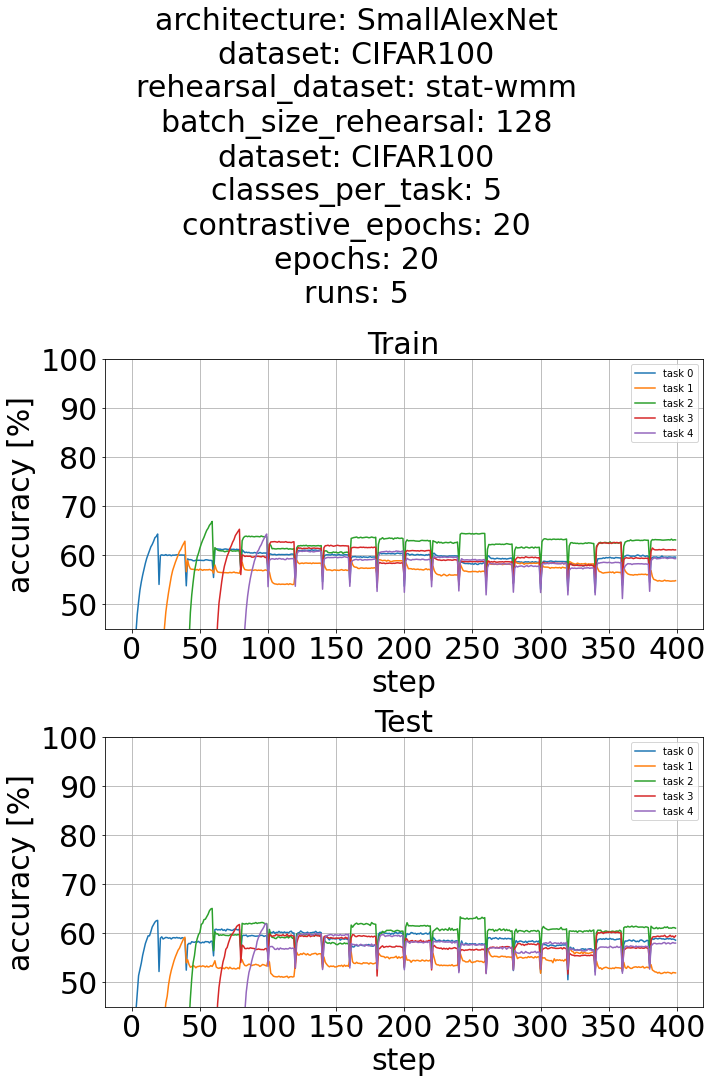

In [8]:
viz.plot_single_setting_aggregated("stat-wmm;128;CIFAR100;5;20;20", layout='vertical_short', filename="contrastive_2", fontsize=30)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           43.32 &     51.62 &               5.52 &  test \\
    1 &           47.28 &     55.59 &               8.57 &  test \\
    2 &           53.28 &     57.20 &              10.52 &  test \\
    3 &           53.48 &     57.06 &              21.60 &  test \\
    4 &           52.00 &     53.08 &               0.00 &  test \\
\bottomrule
\end{tabular}



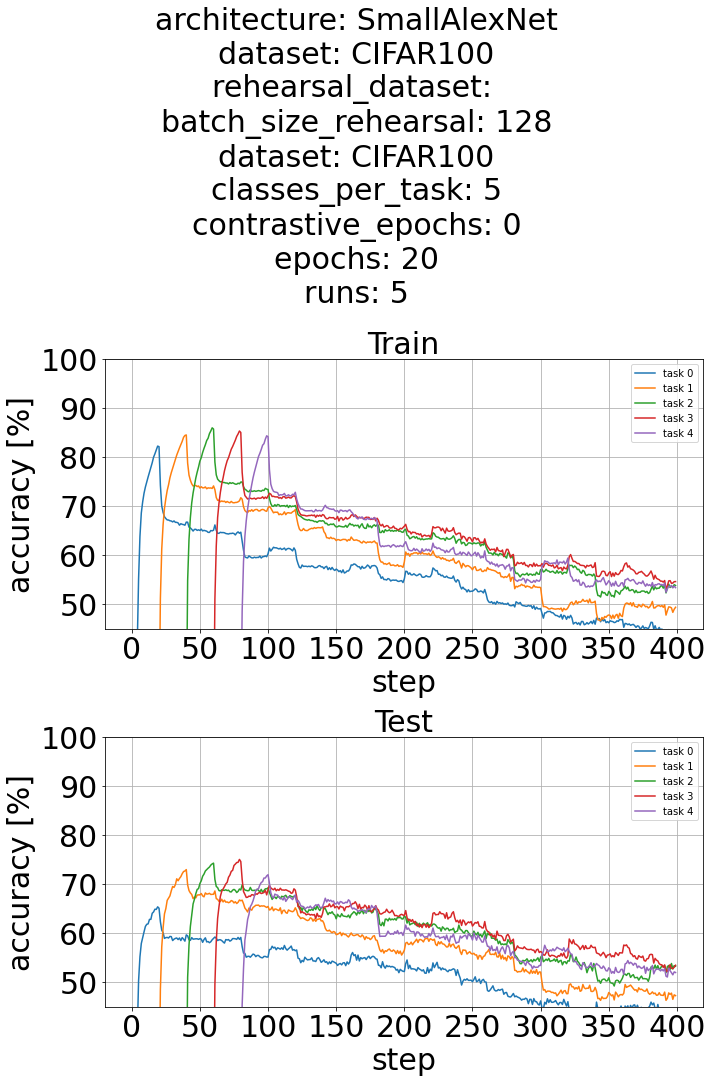

In [9]:
viz.plot_single_setting_aggregated(";128;CIFAR100;5;0;20", layout='vertical_short', filename="contrastive_3", fontsize=30)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:406: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           40.84 &     49.03 &               4.93 &  test \\
    1 &           51.00 &     56.29 &               6.96 &  test \\
    2 &           44.80 &     49.29 &              10.36 &  test \\
    3 &           43.80 &     45.93 &              22.00 &  test \\
    4 &           48.84 &     49.51 &               0.00 &  test \\
\bottomrule
\end{tabular}



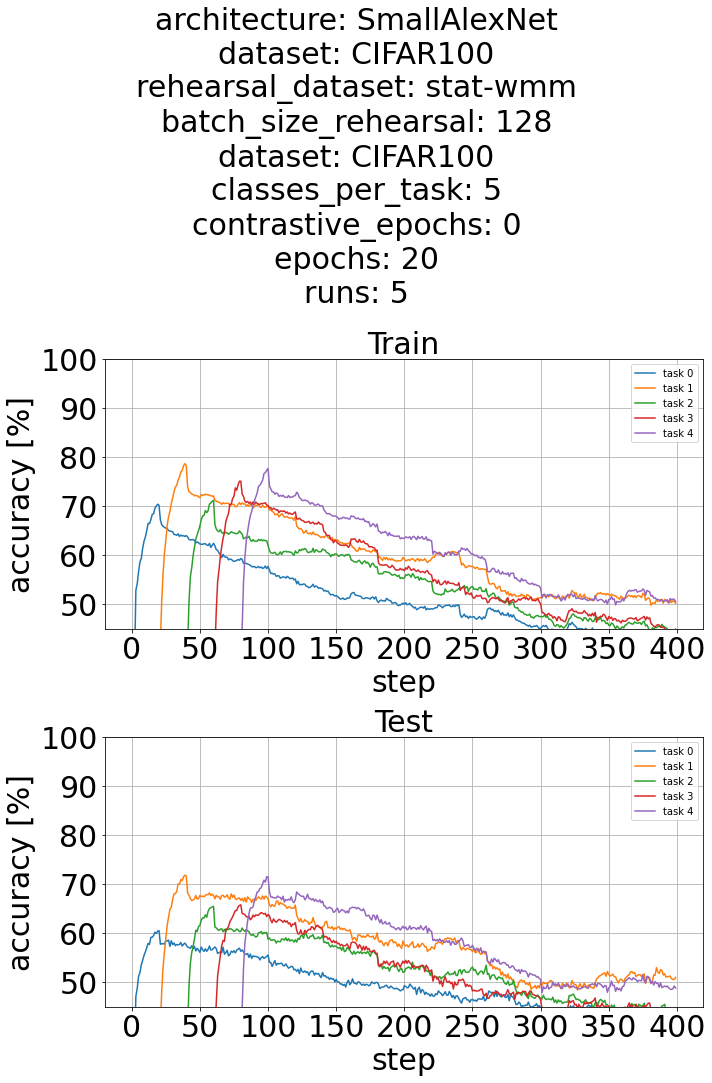

In [10]:
viz.plot_single_setting_aggregated("stat-wmm;128;CIFAR100;5;0;20", layout='vertical_short', filename="contrastive_4", fontsize=30)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:315: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, tight_layout=True)


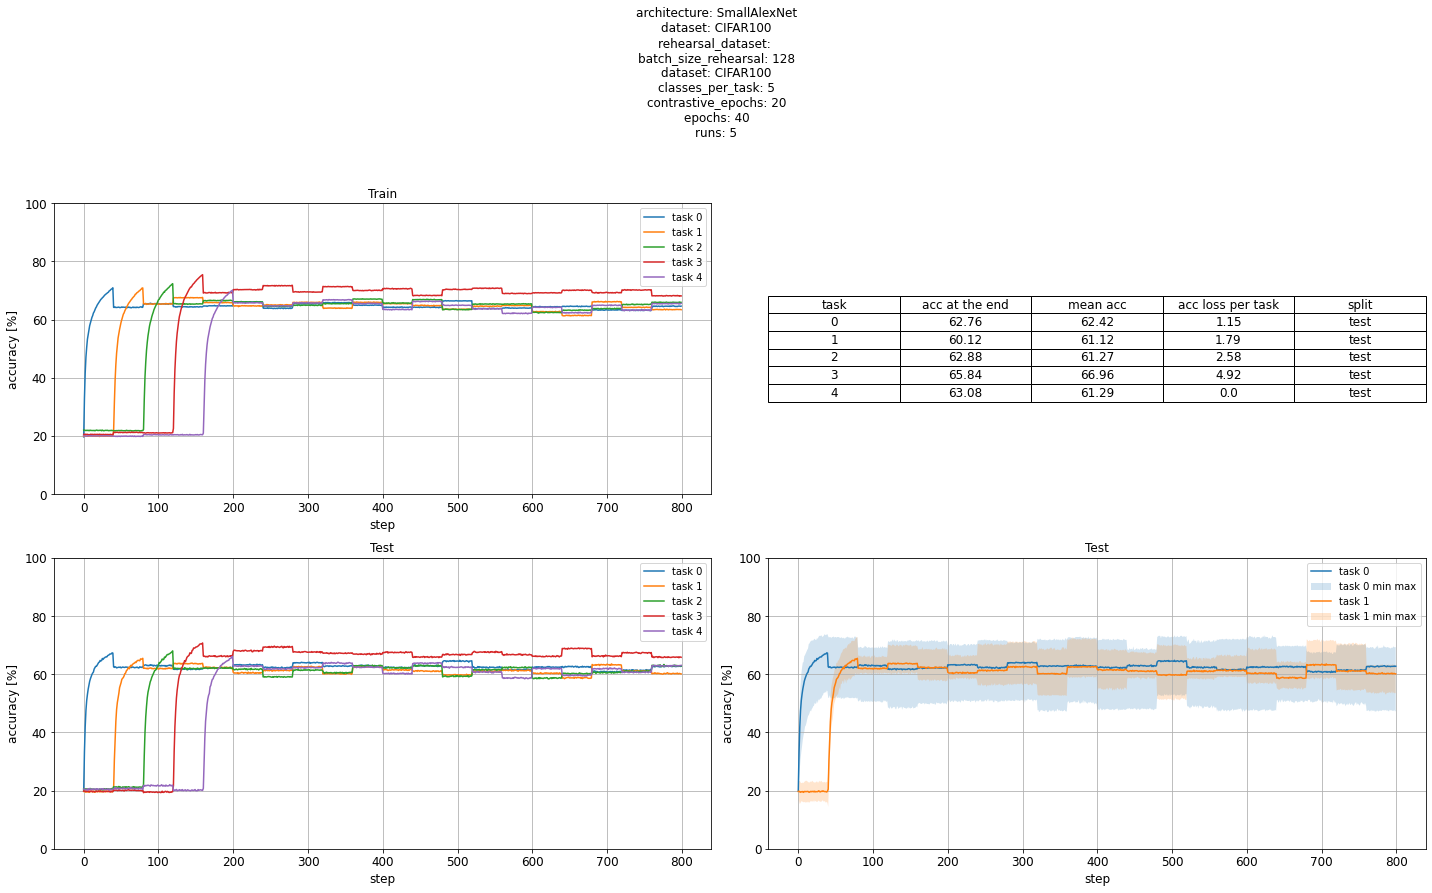

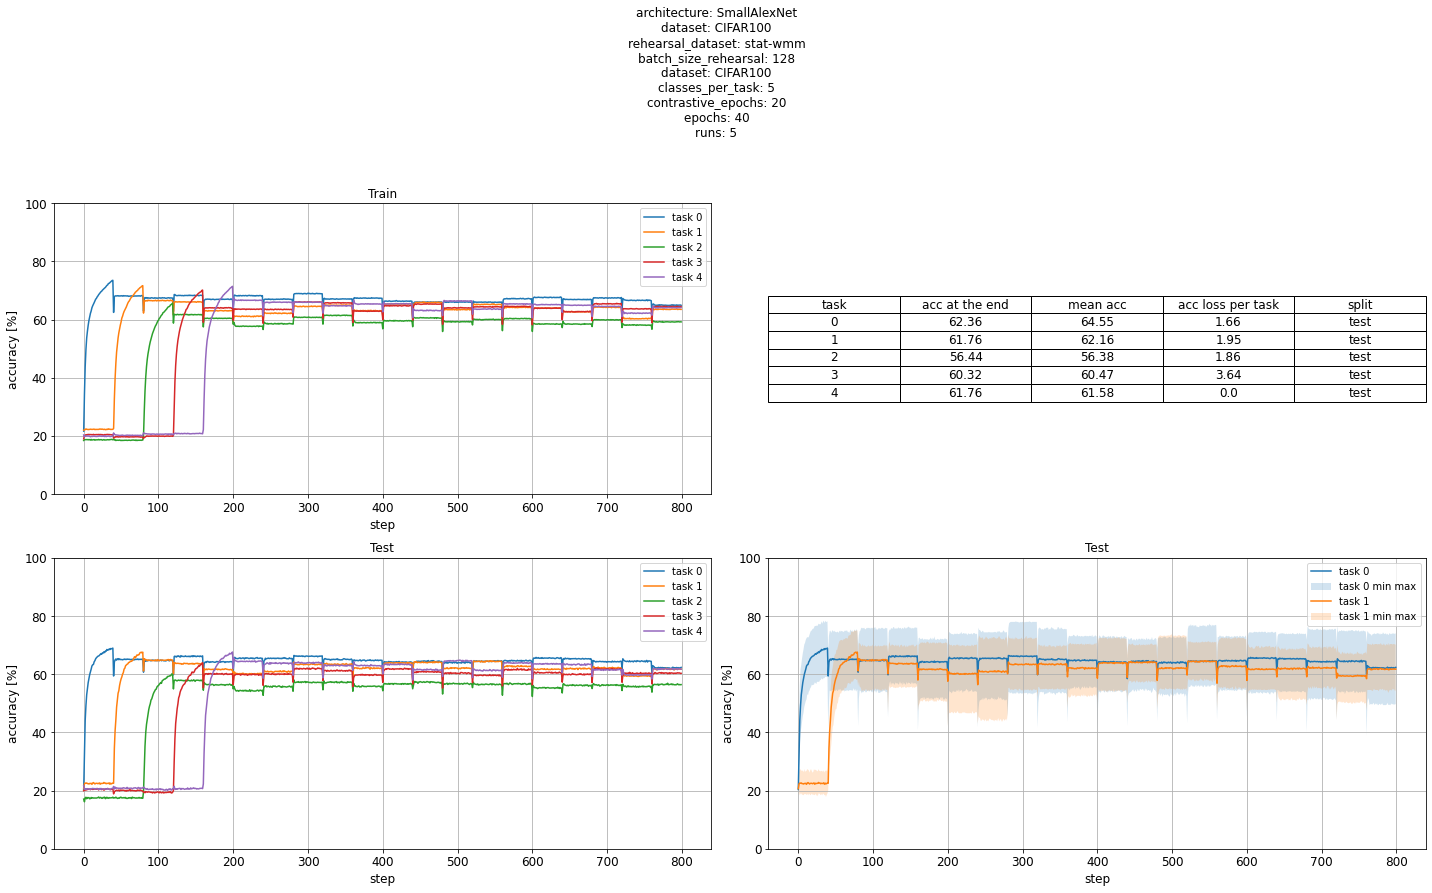

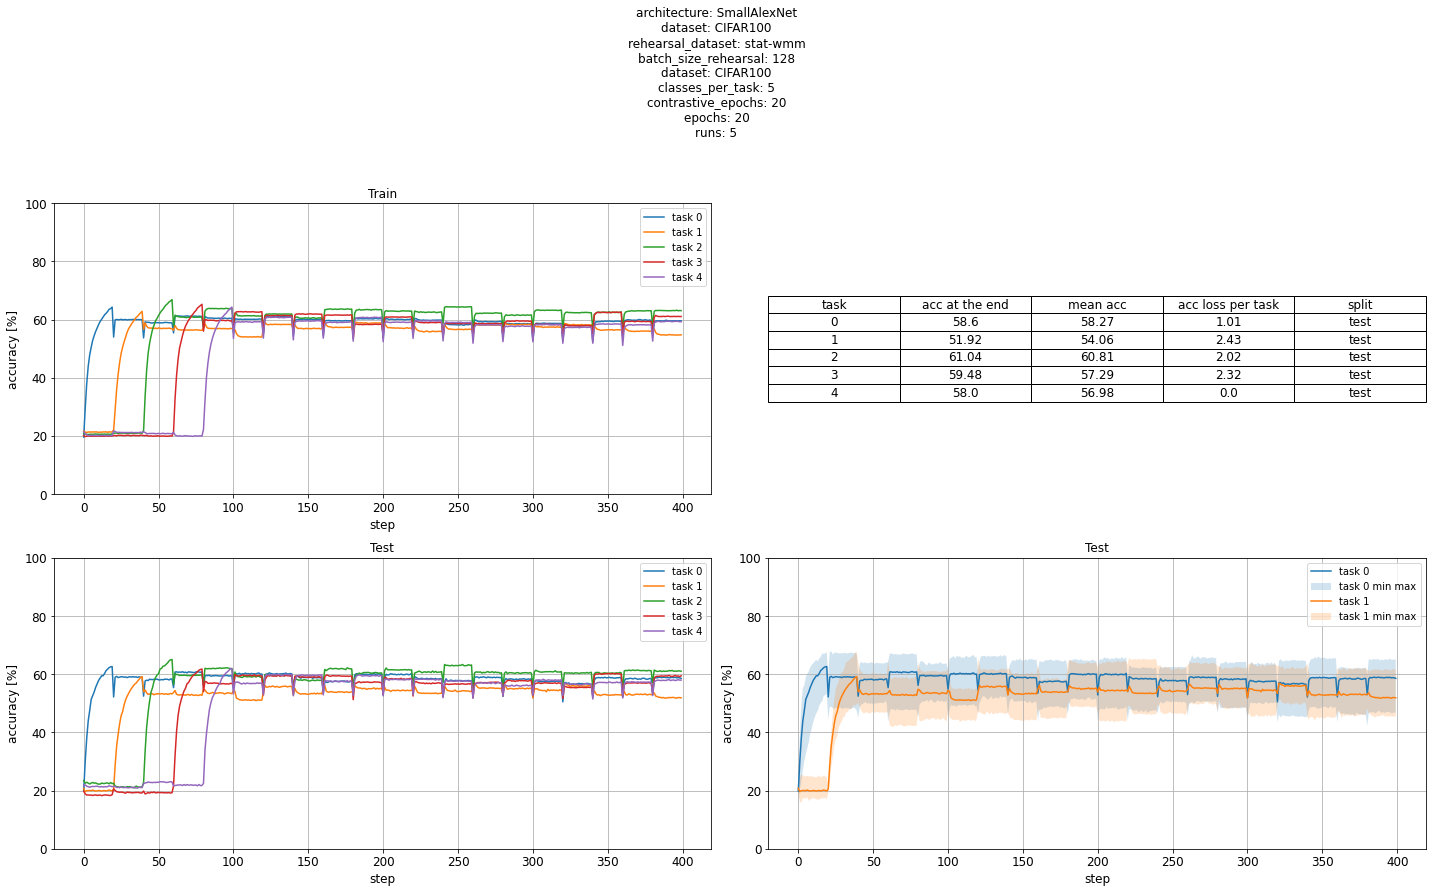

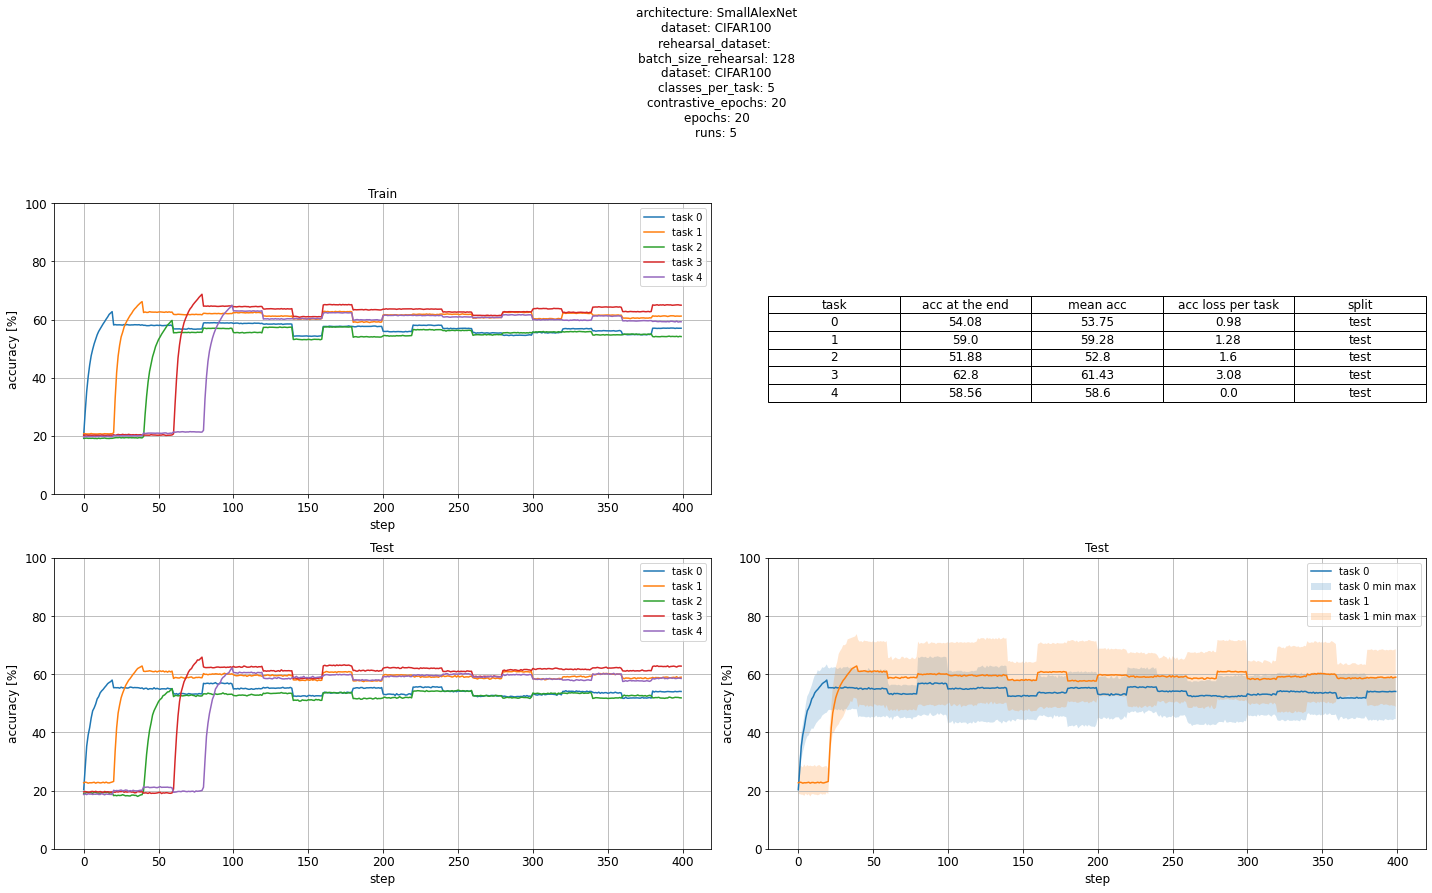

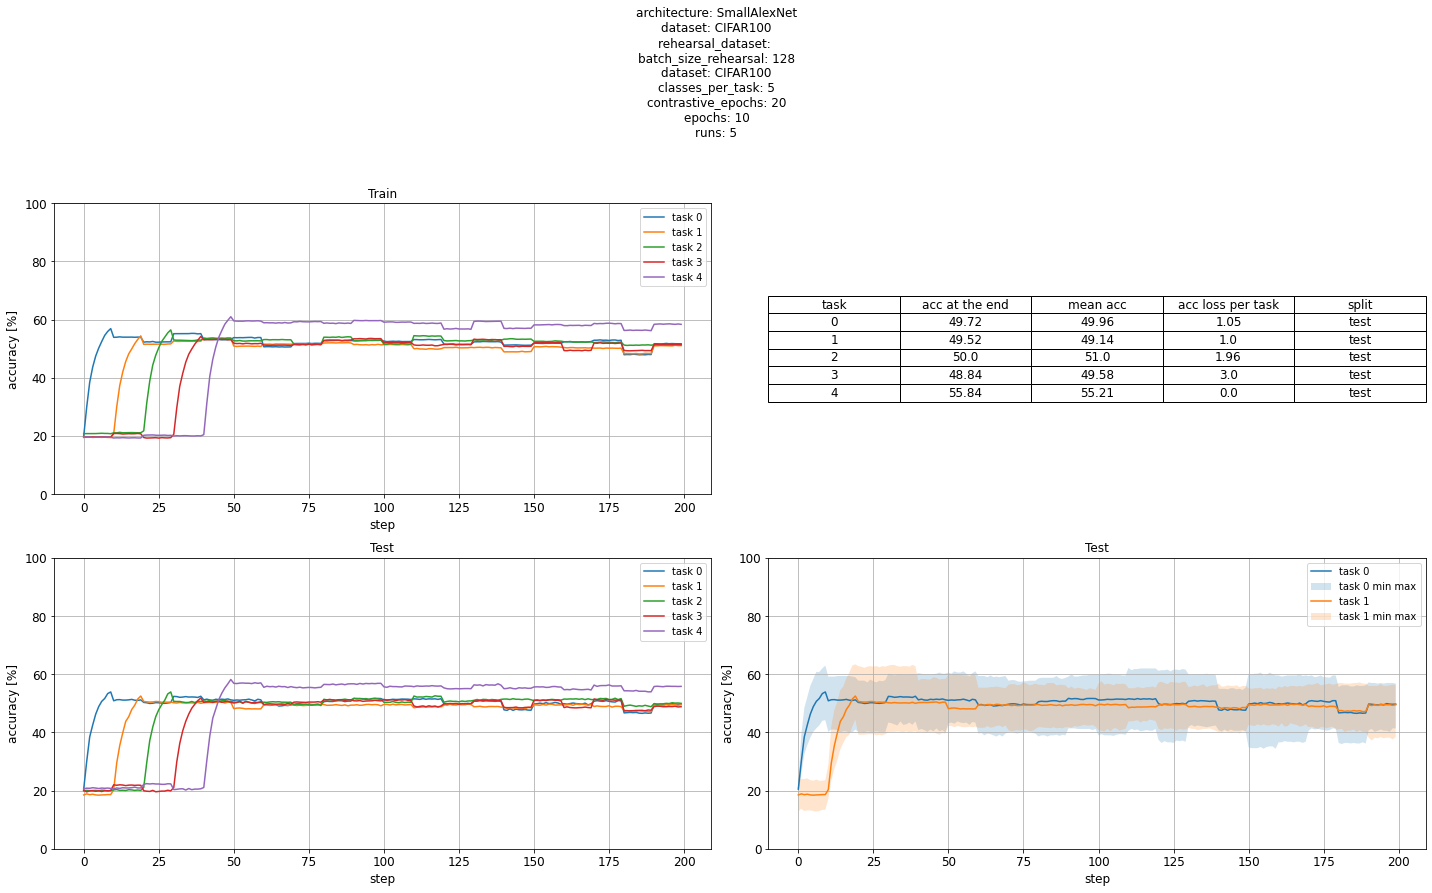

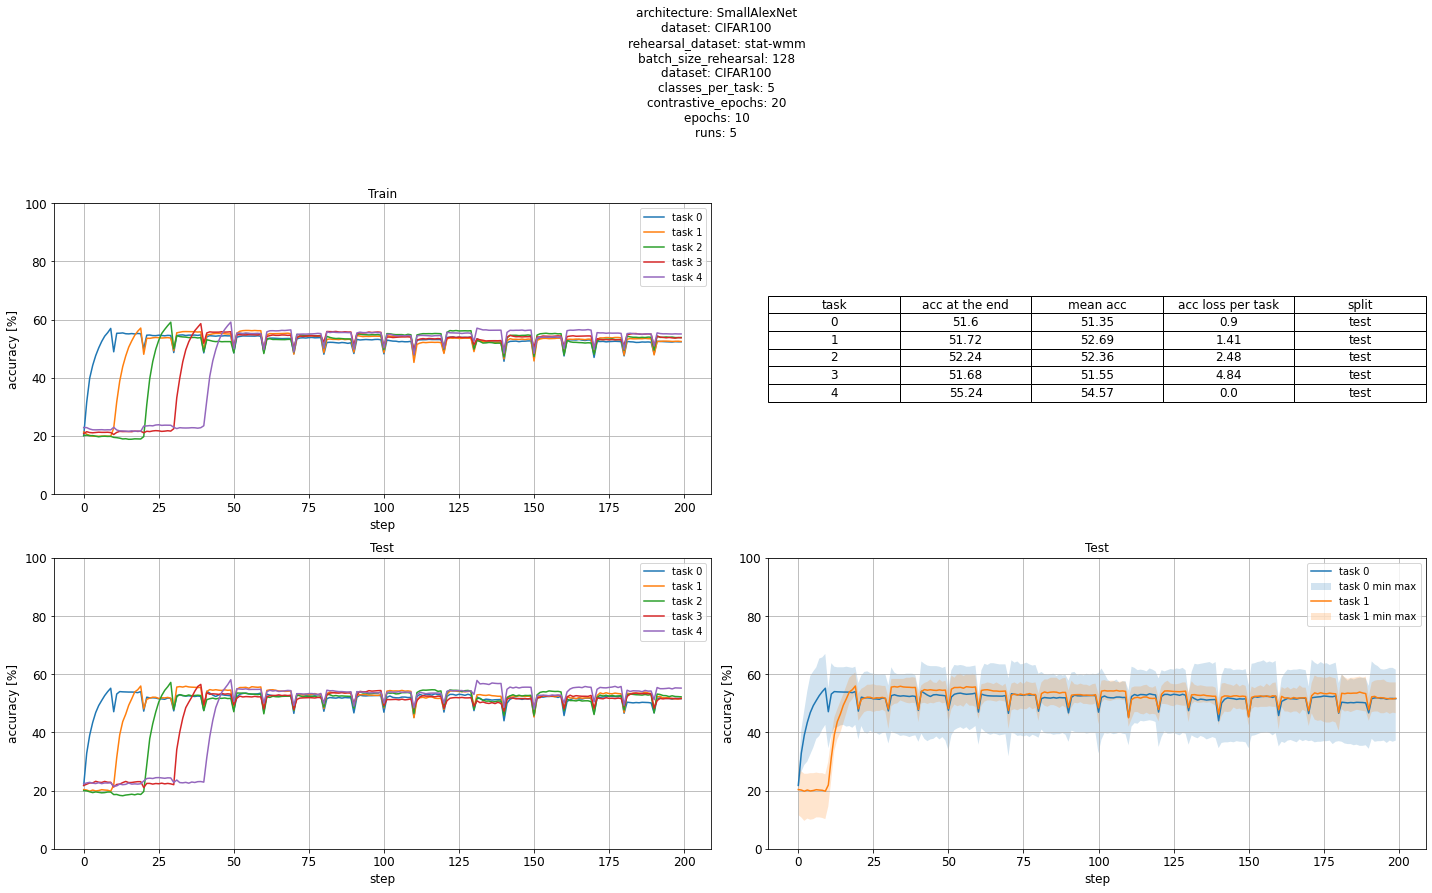

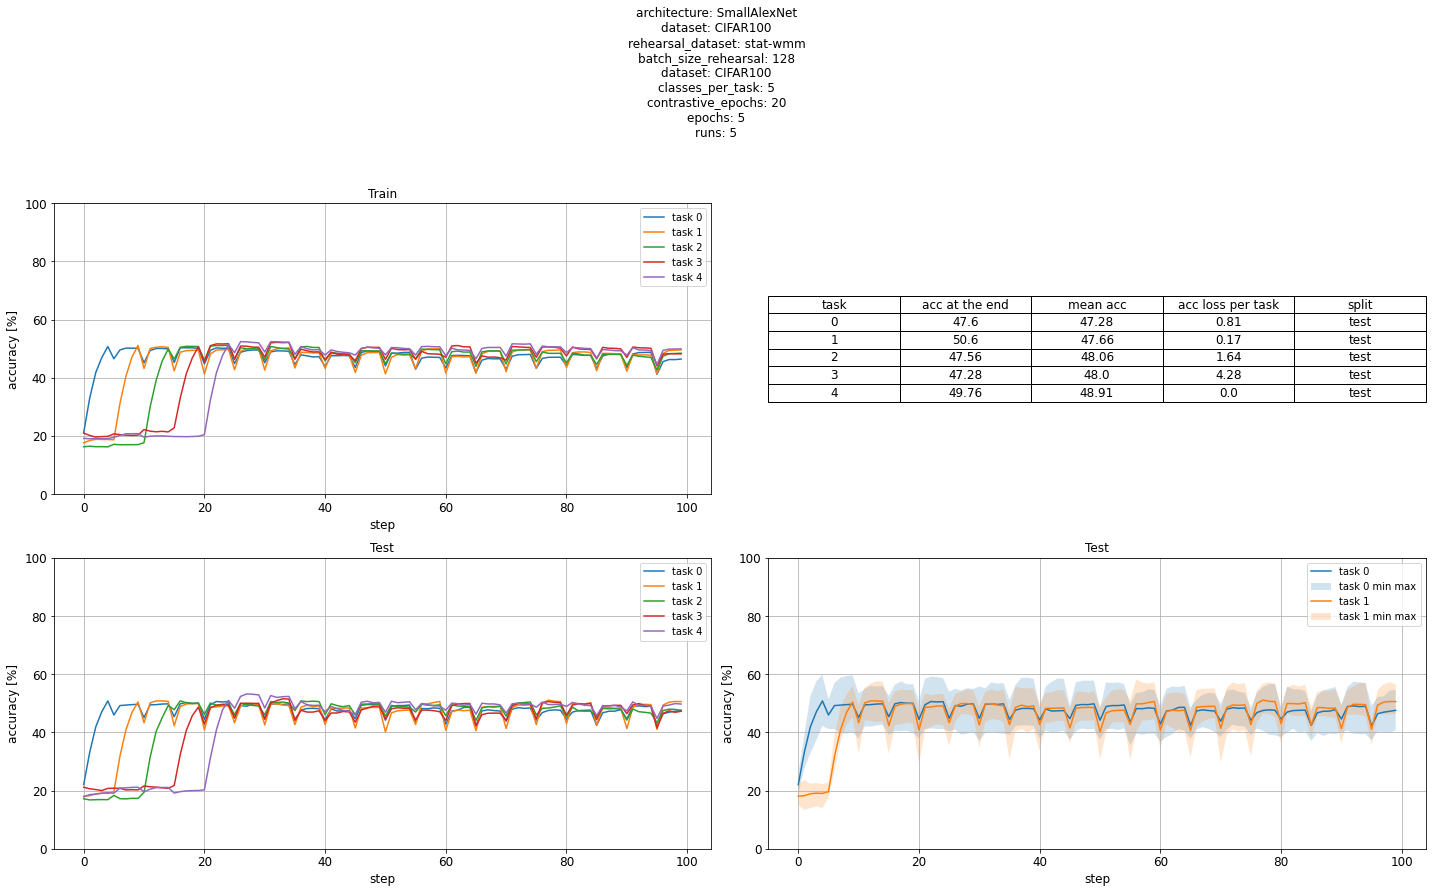

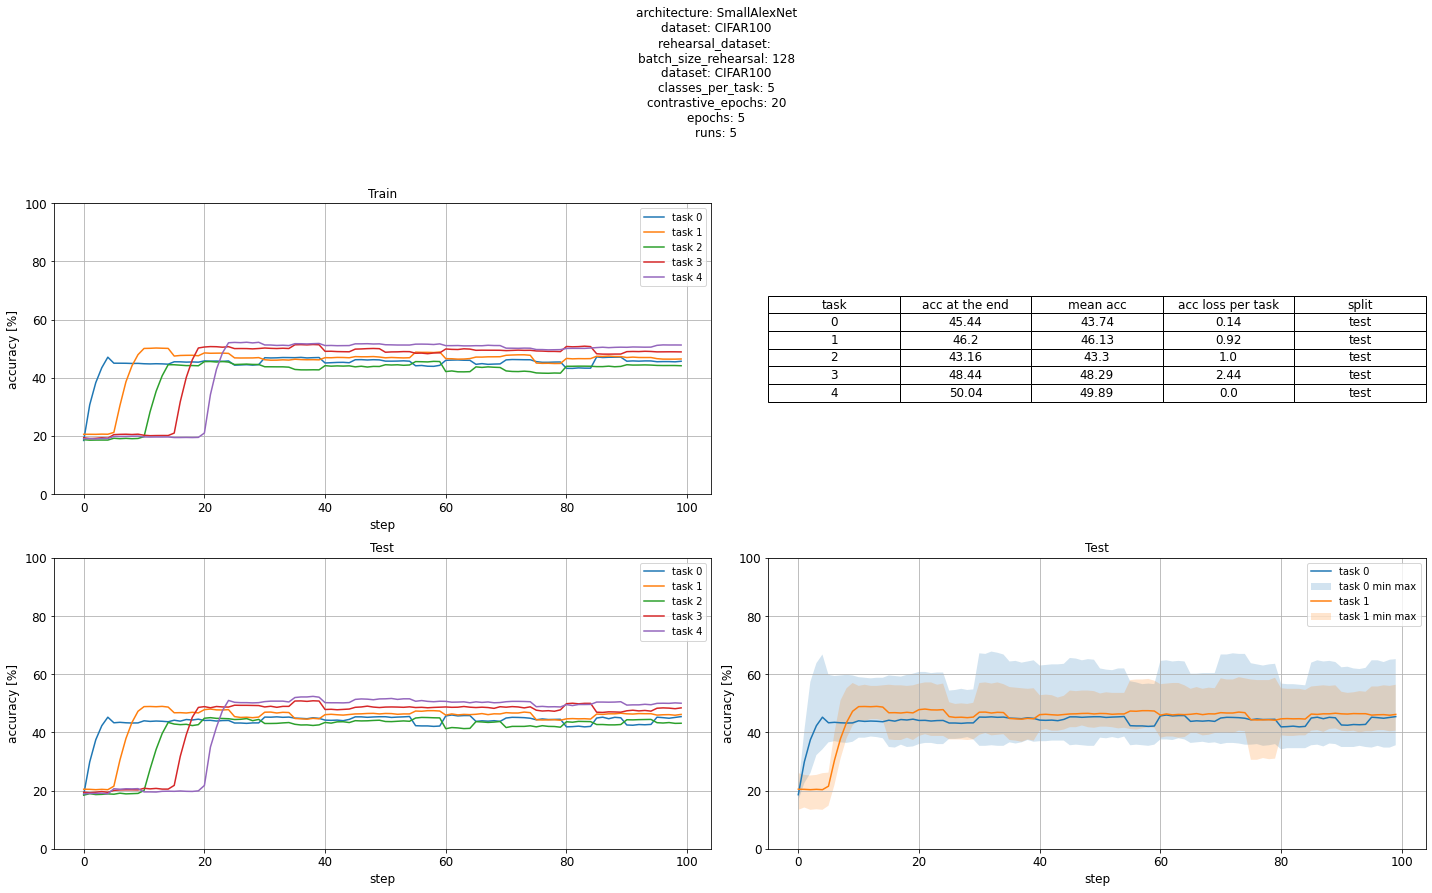

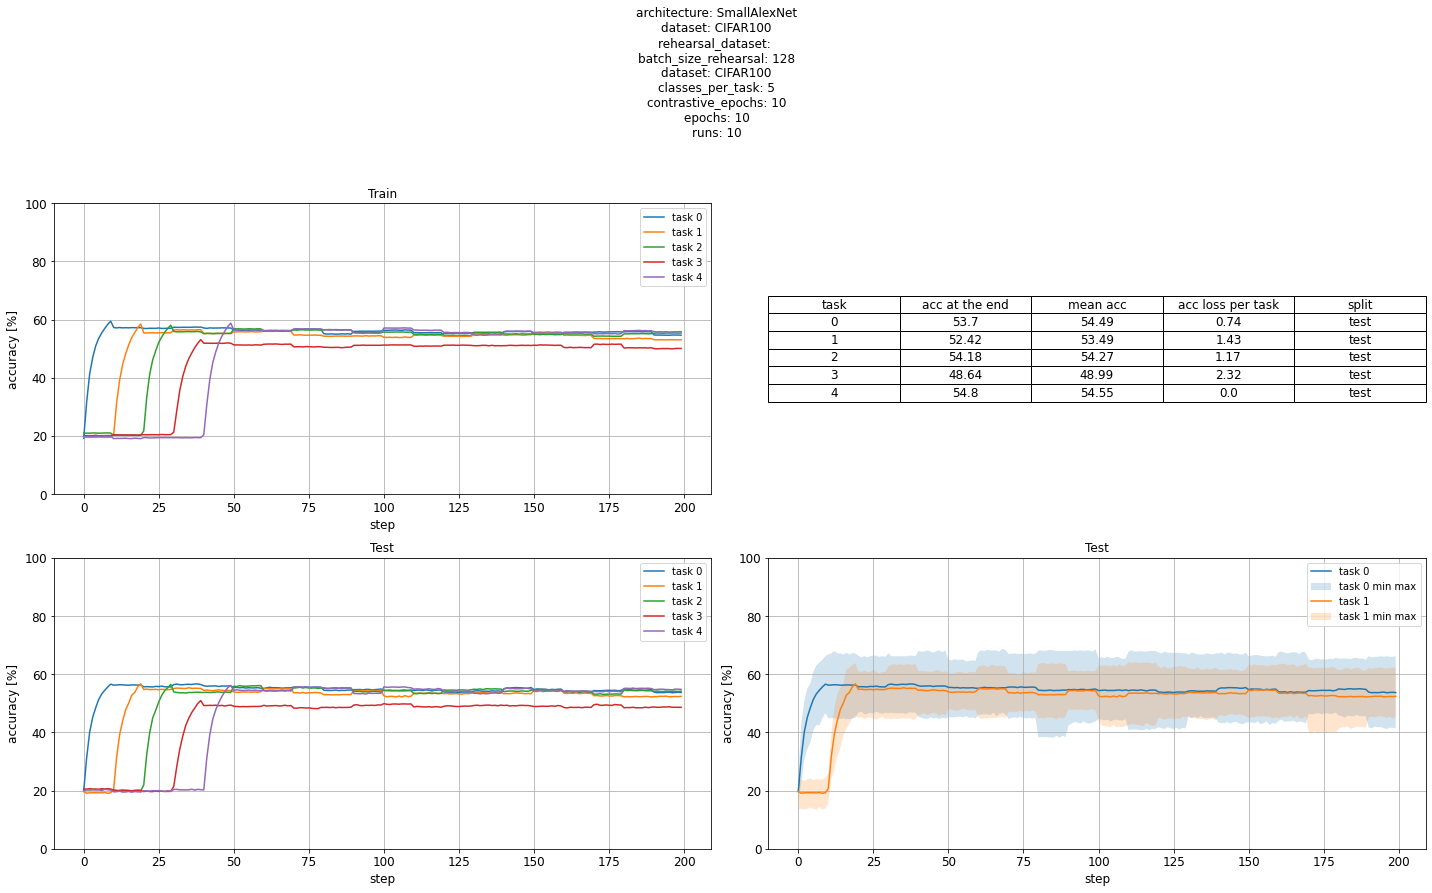

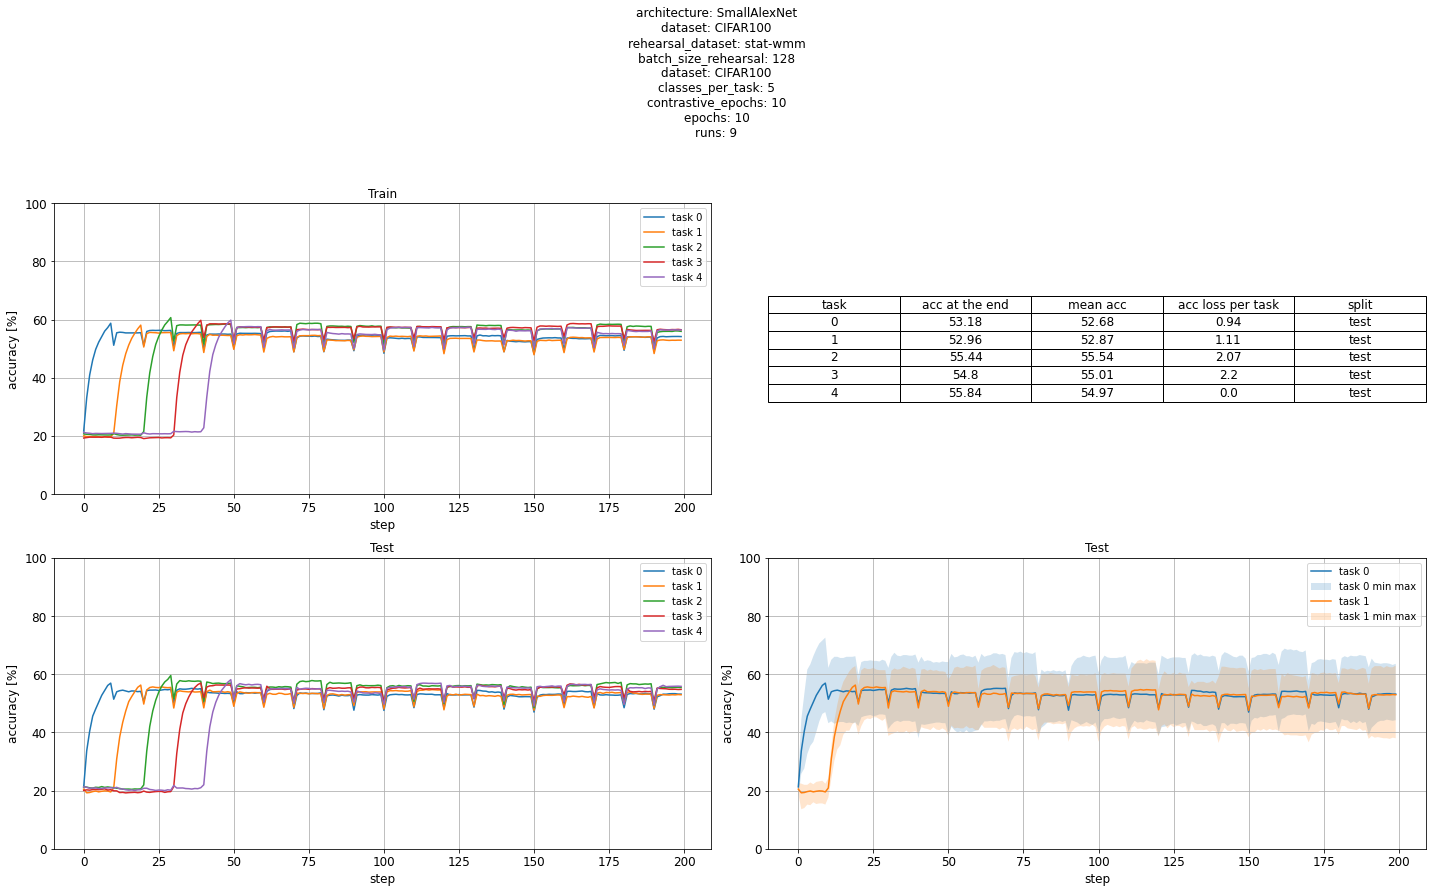

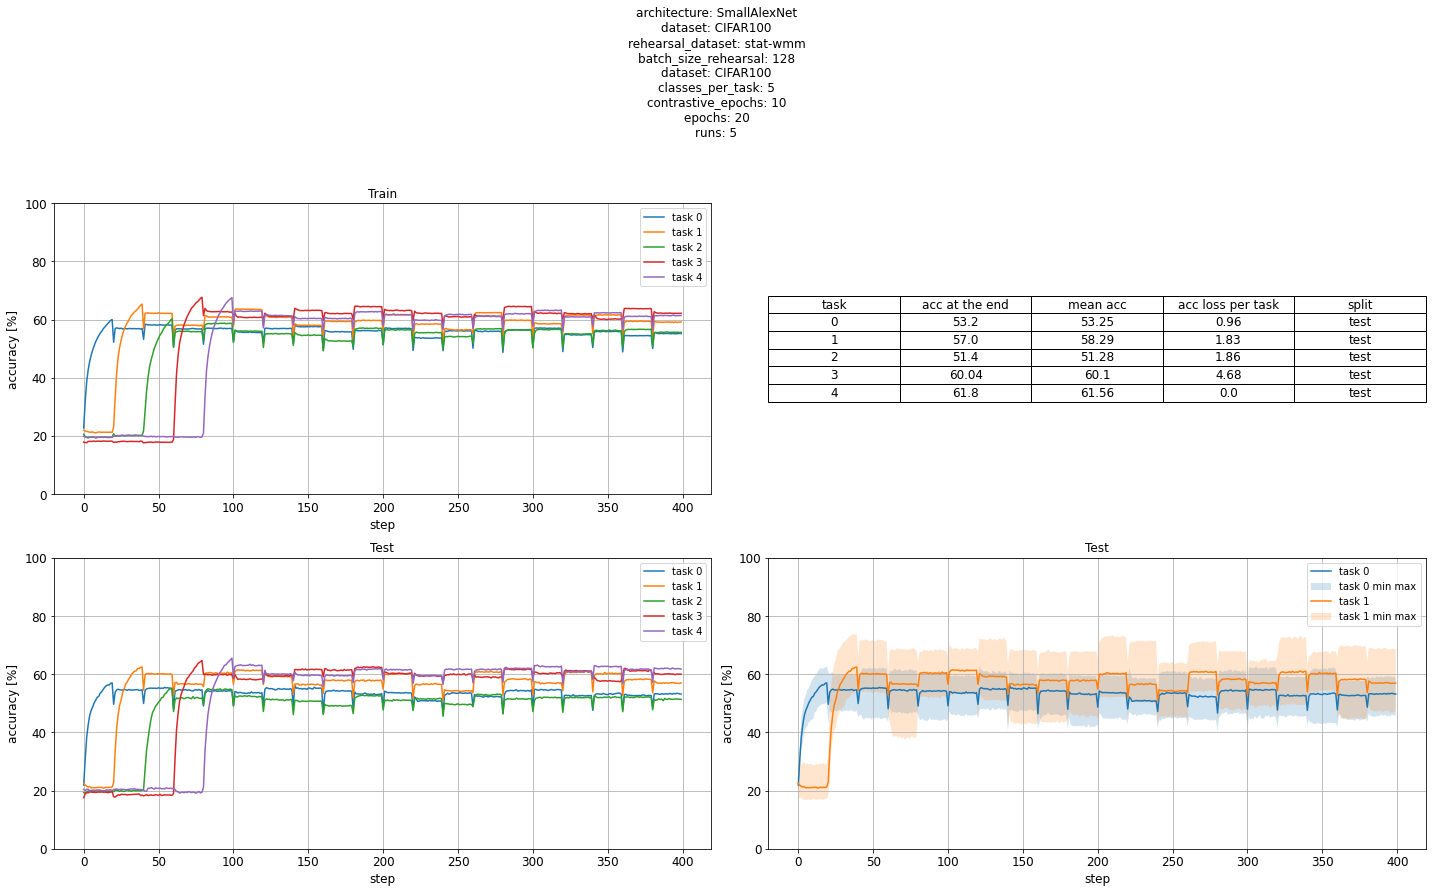

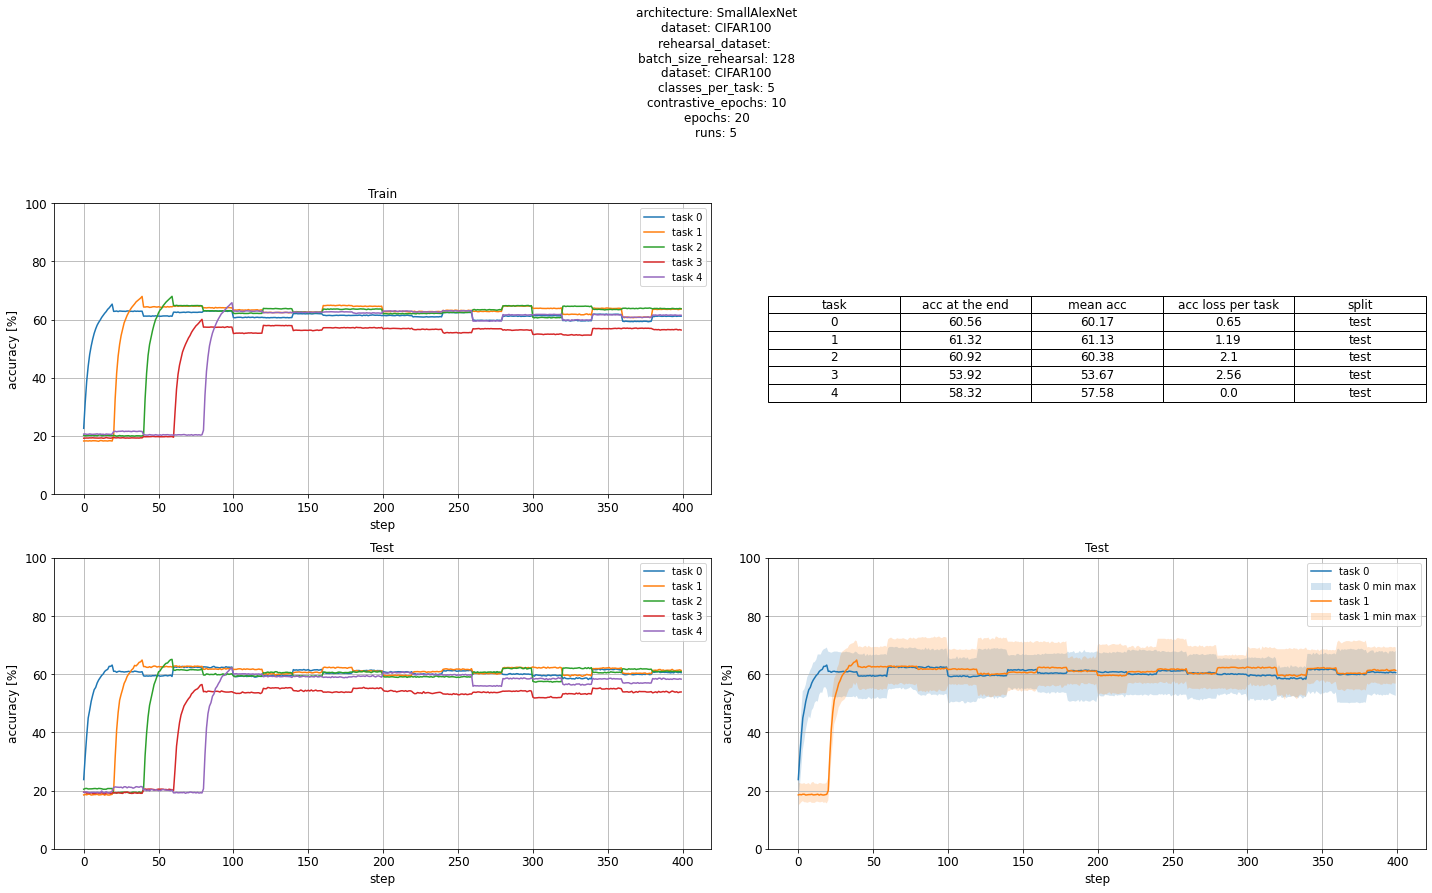

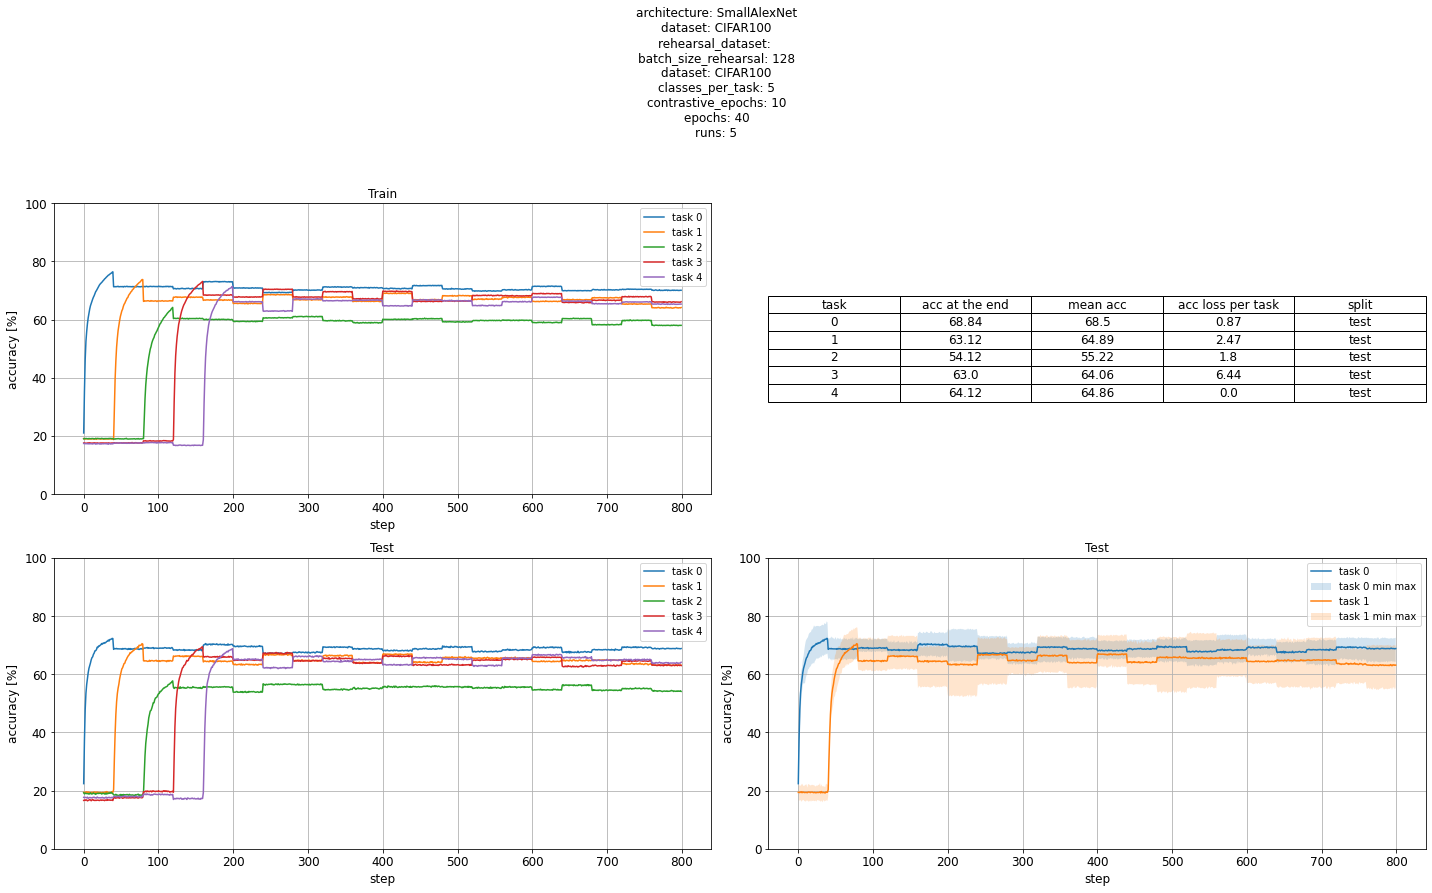

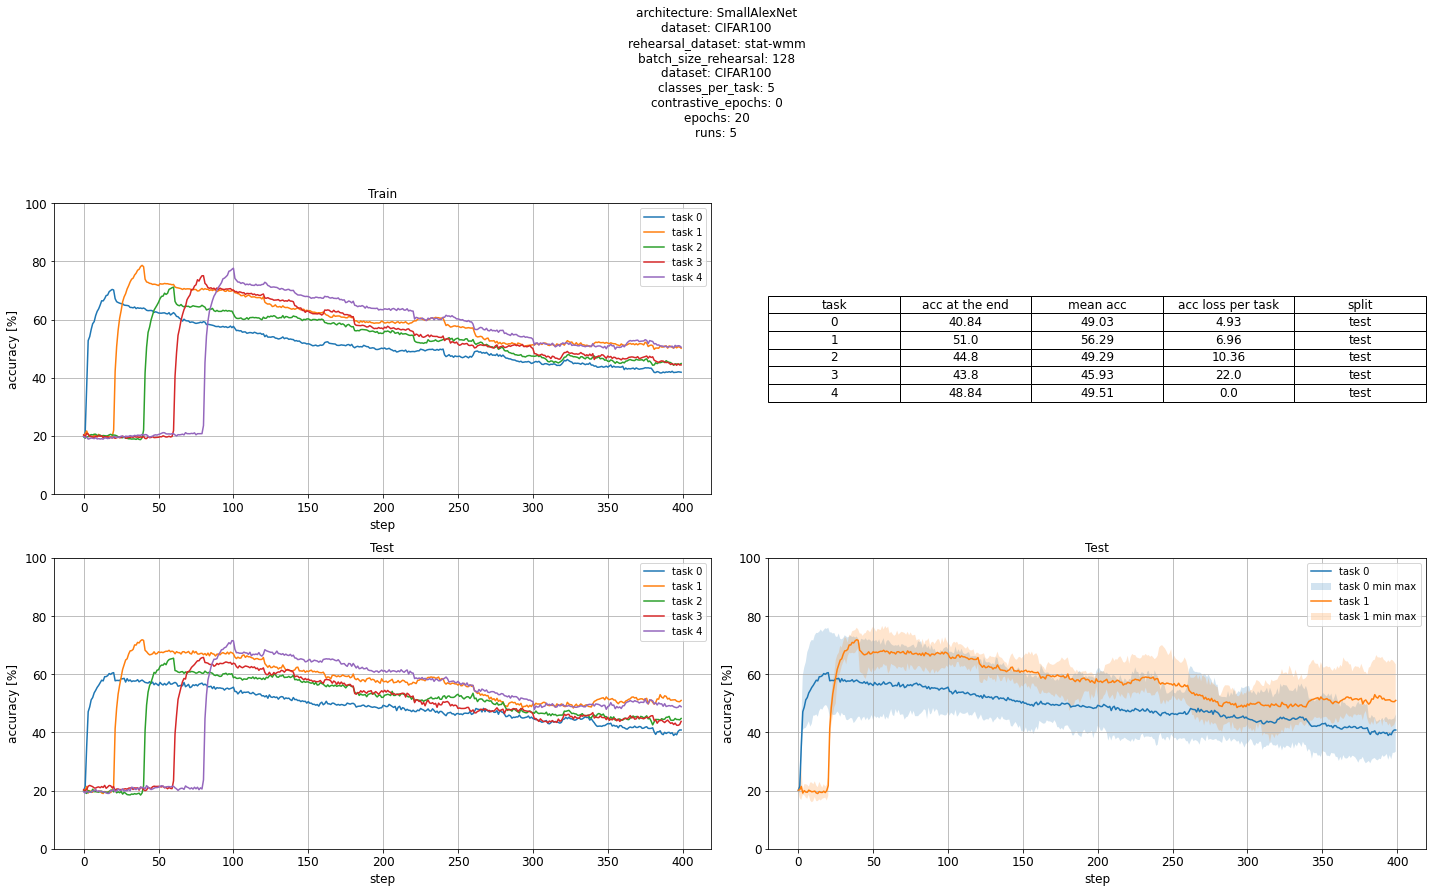

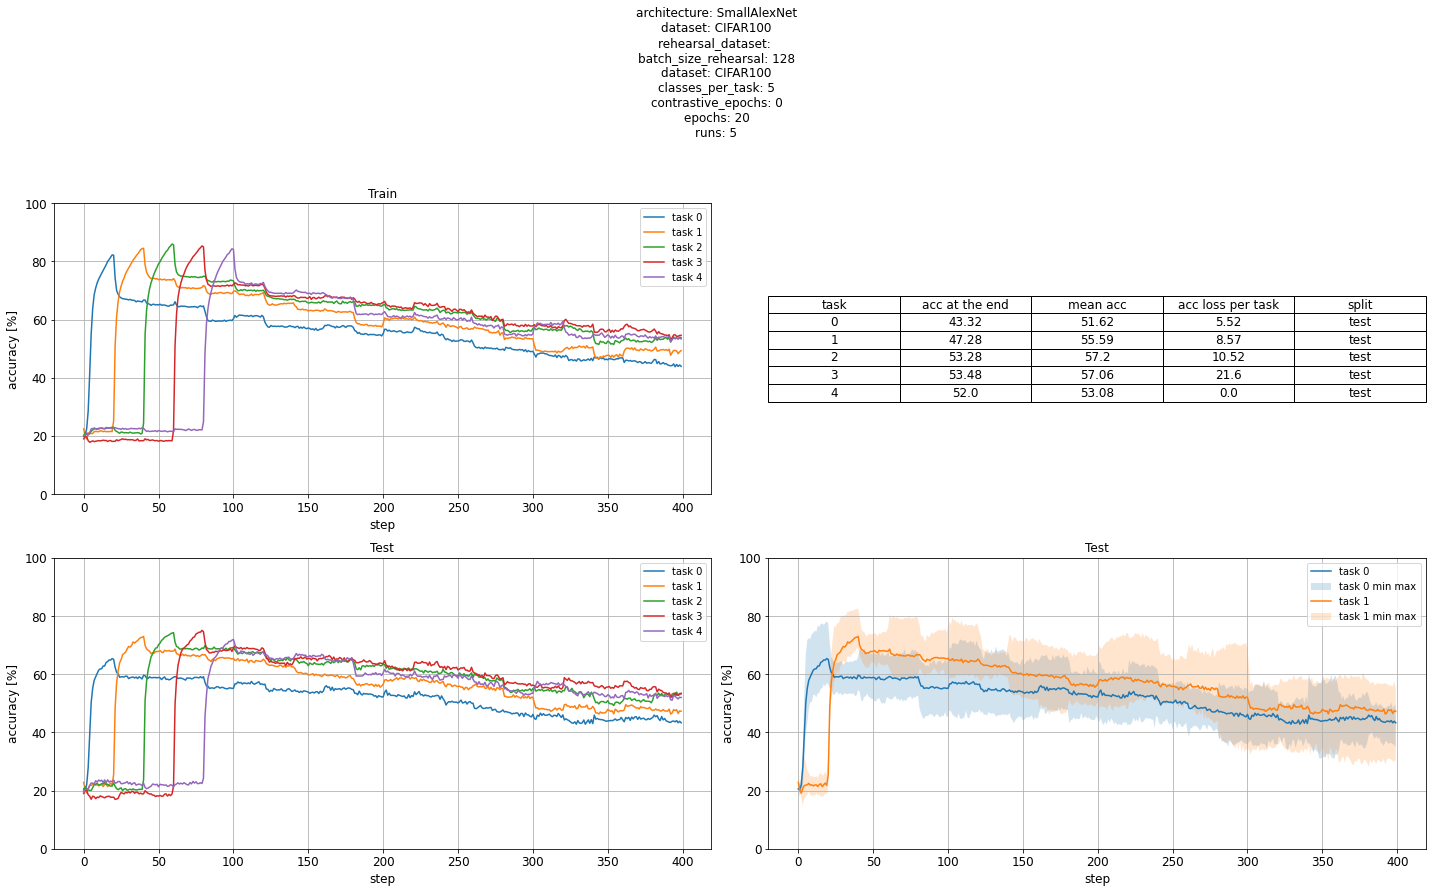

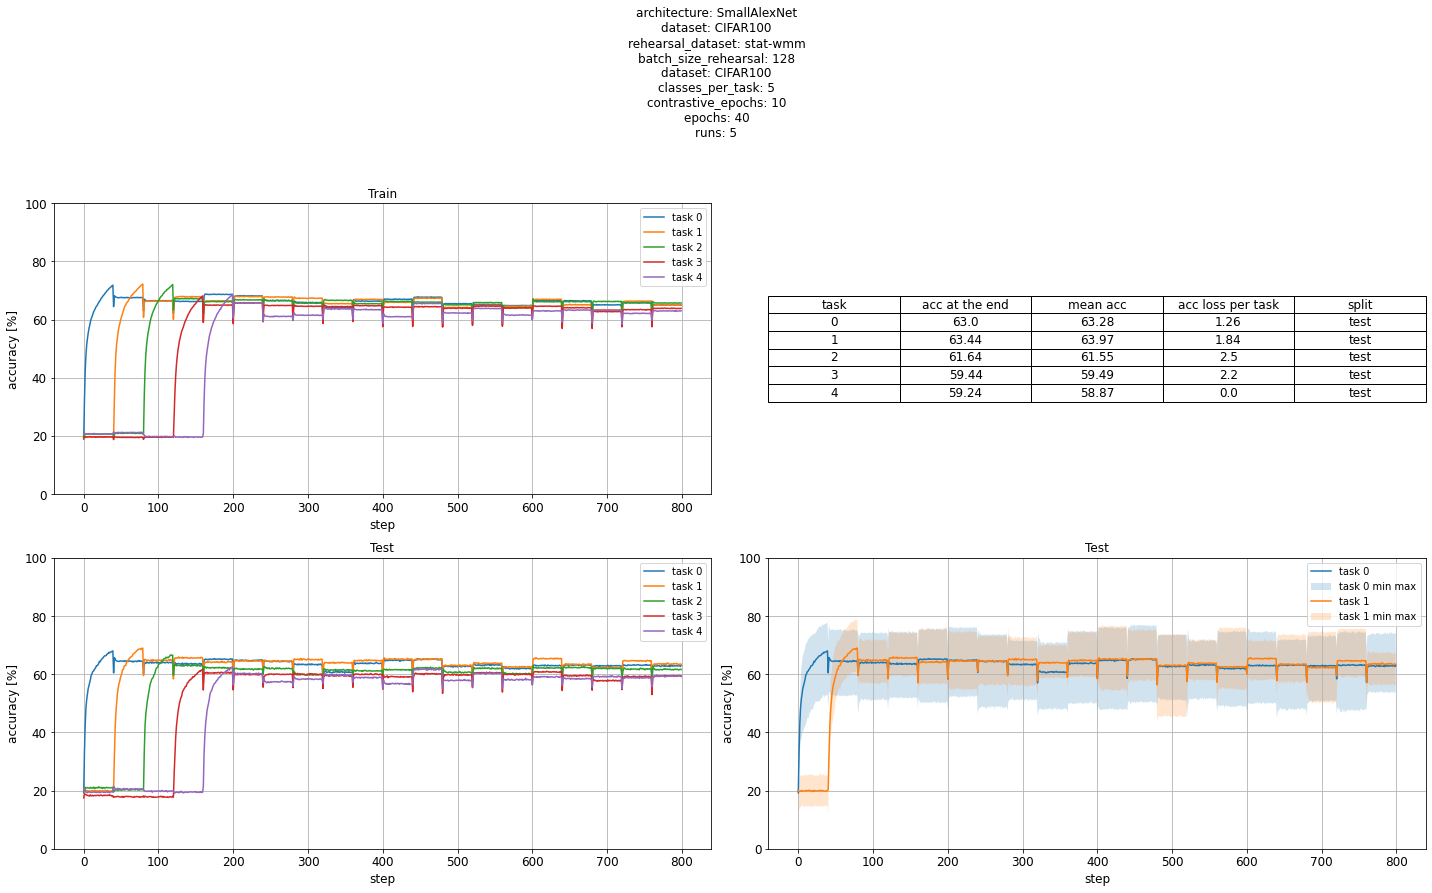

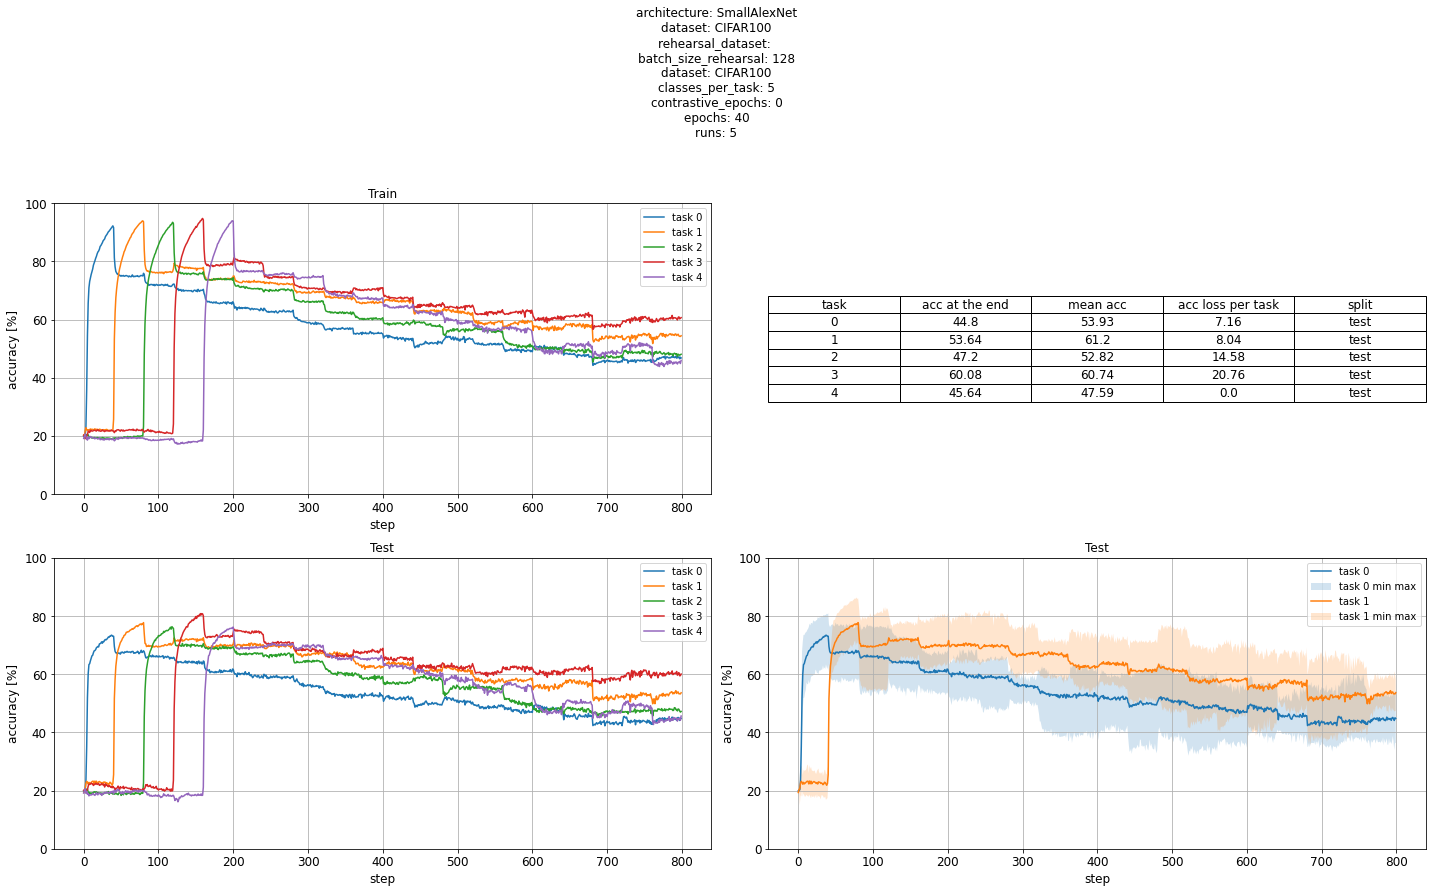

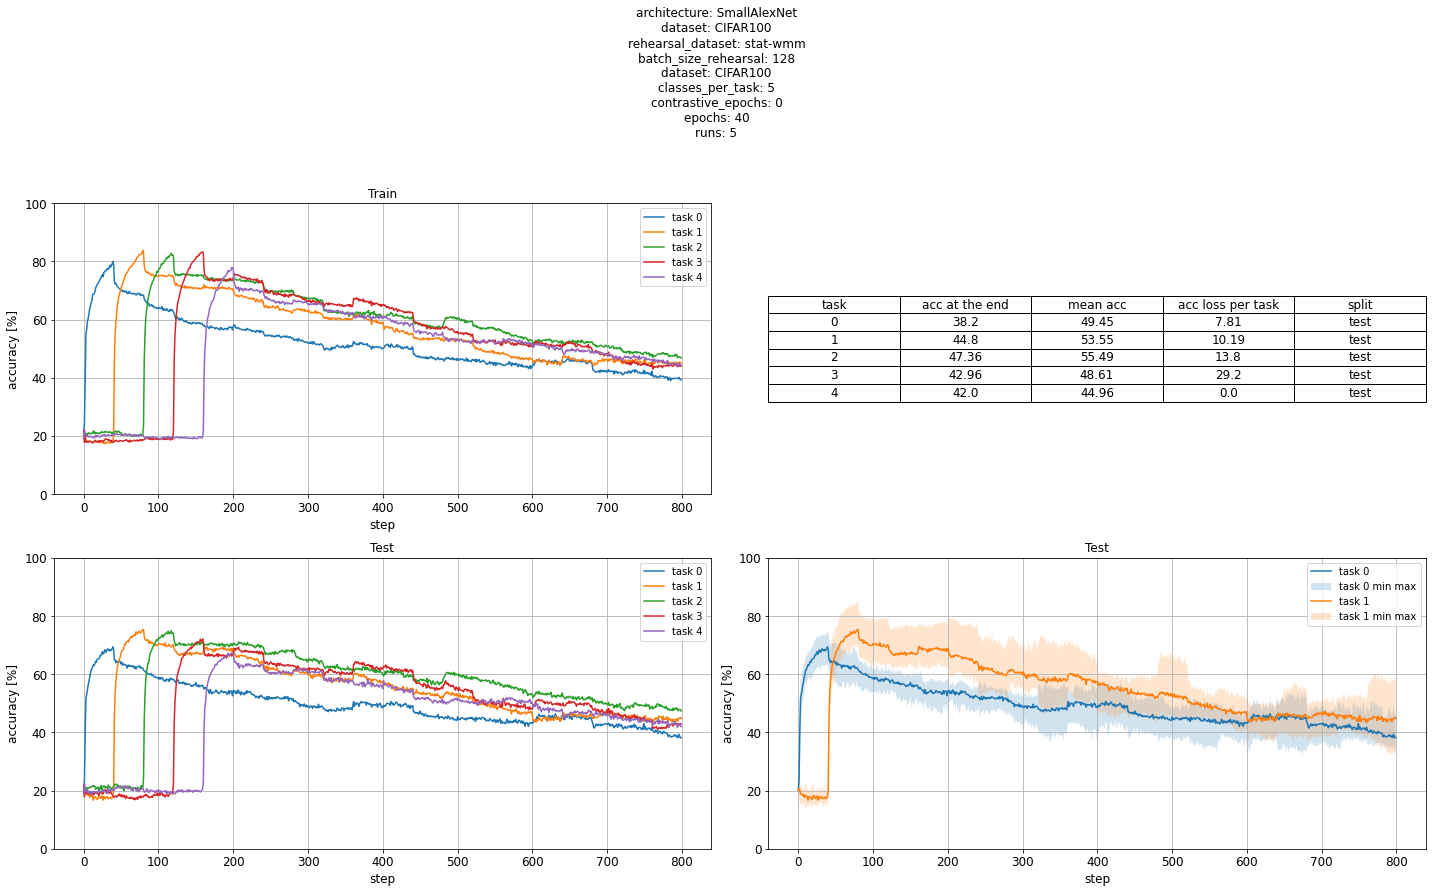

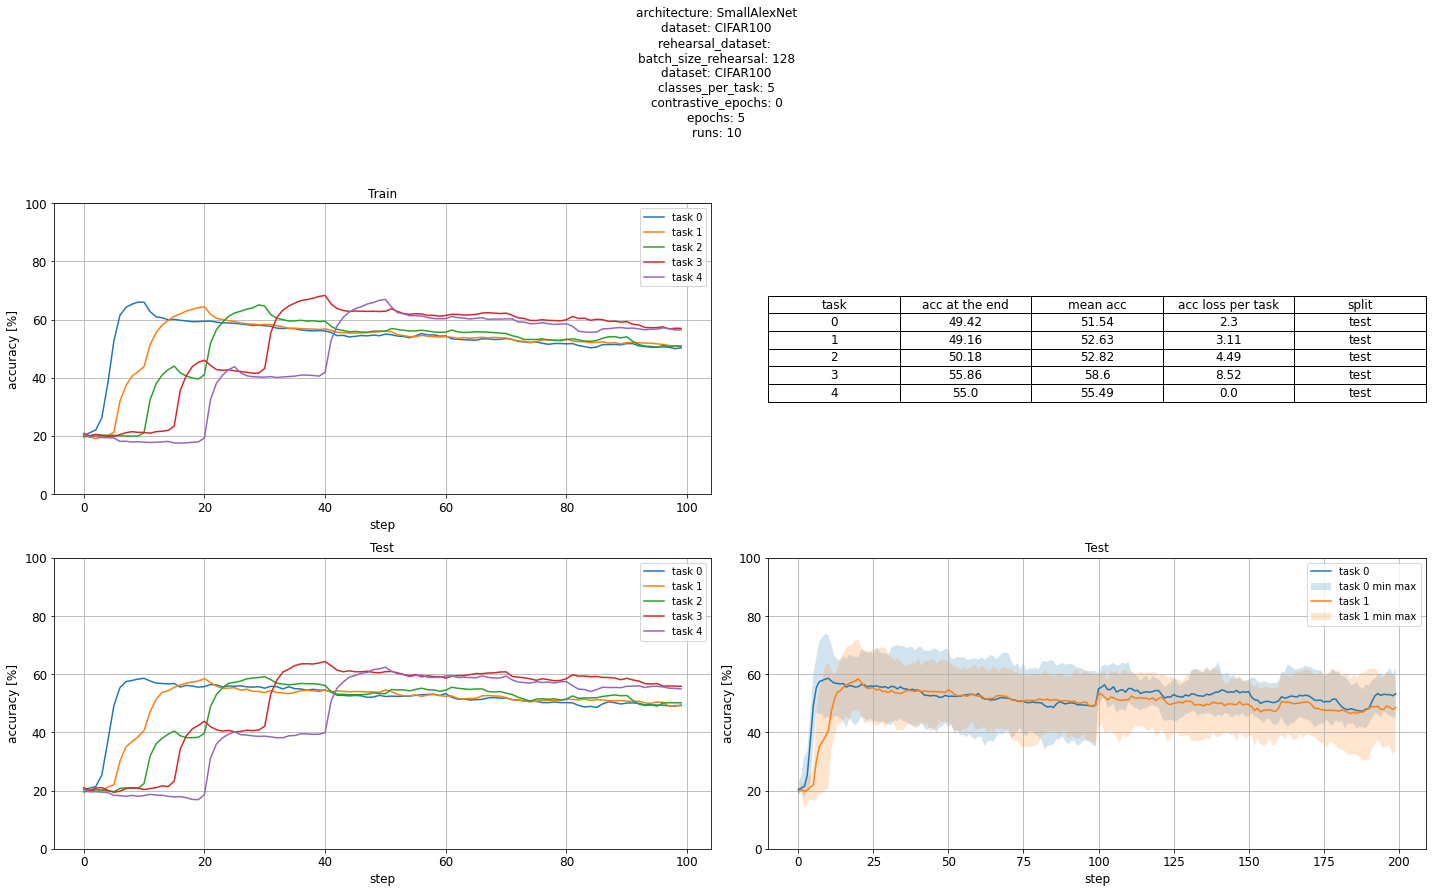

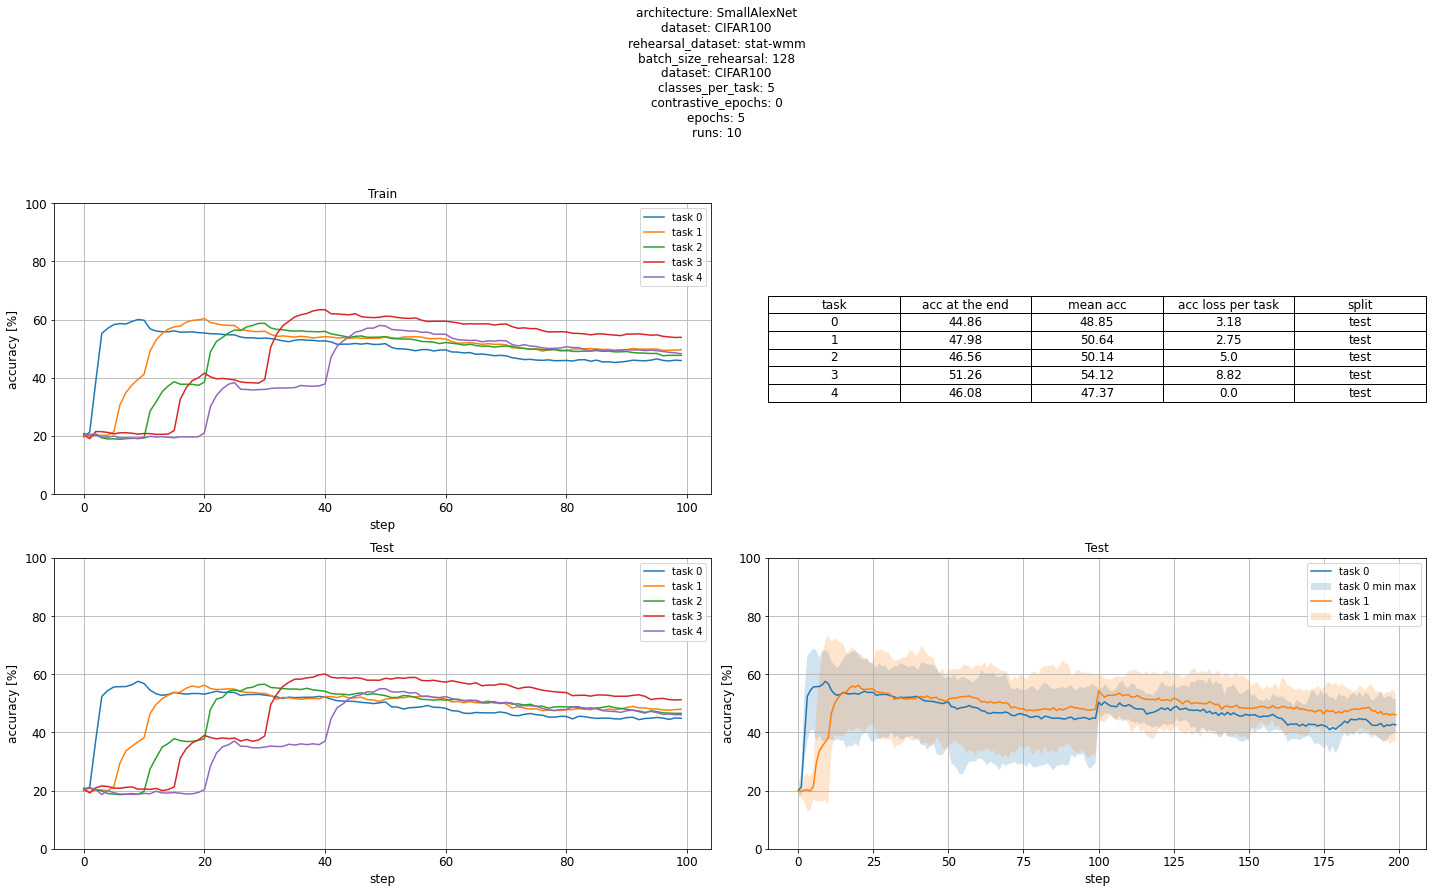

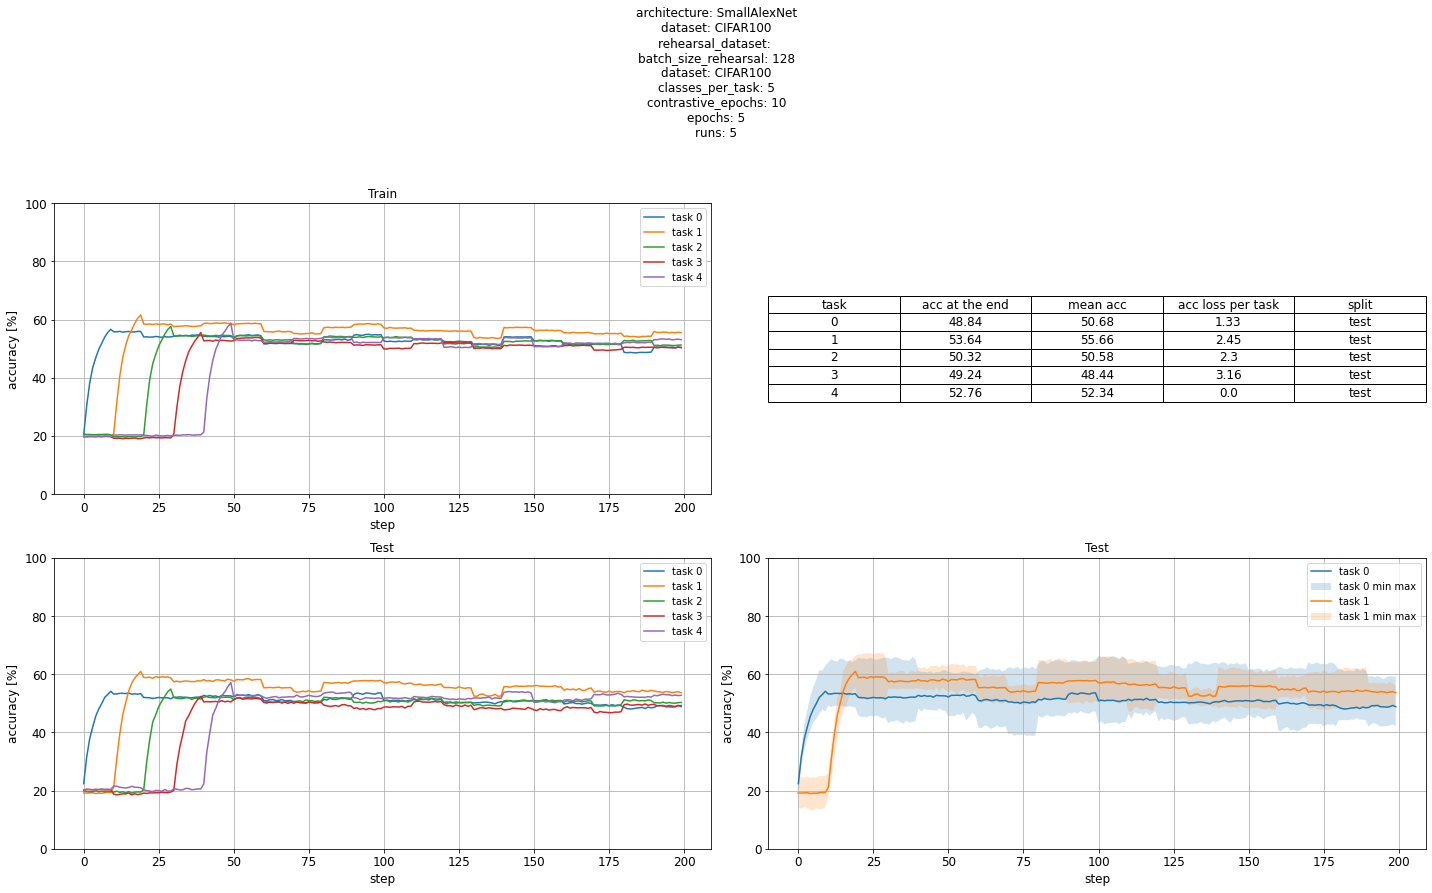

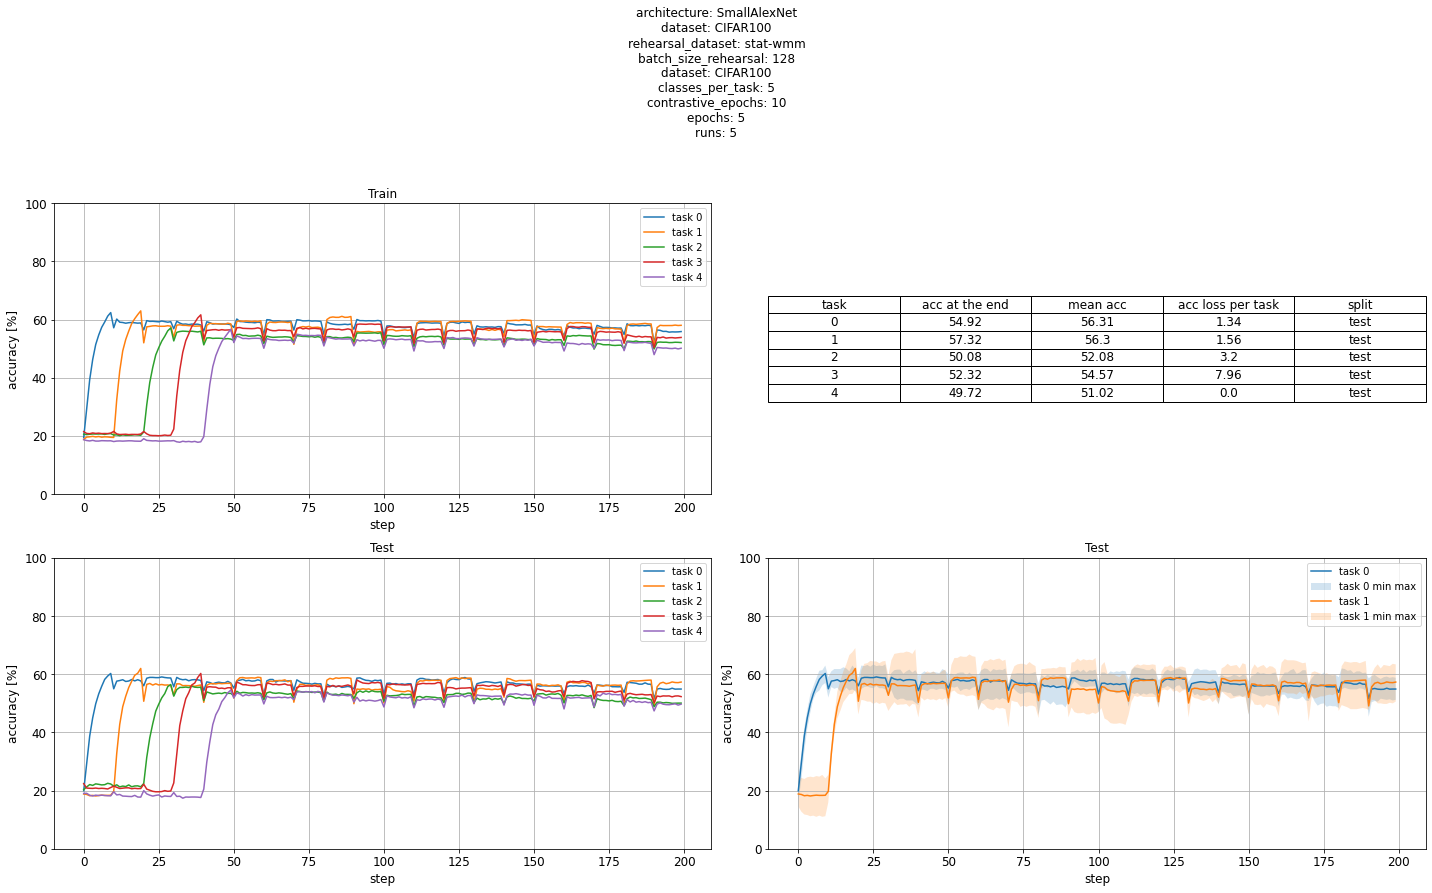

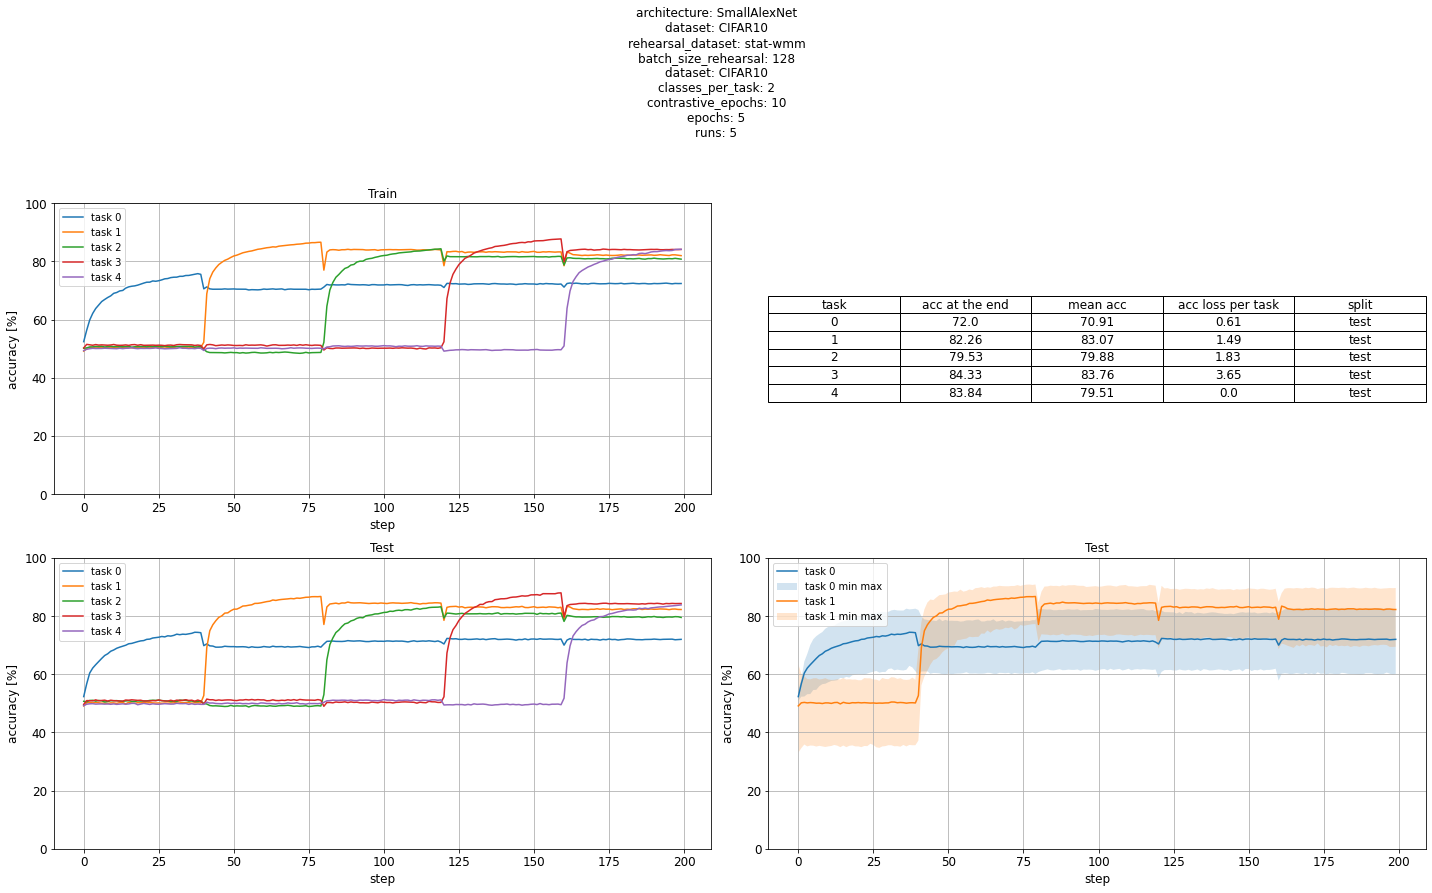

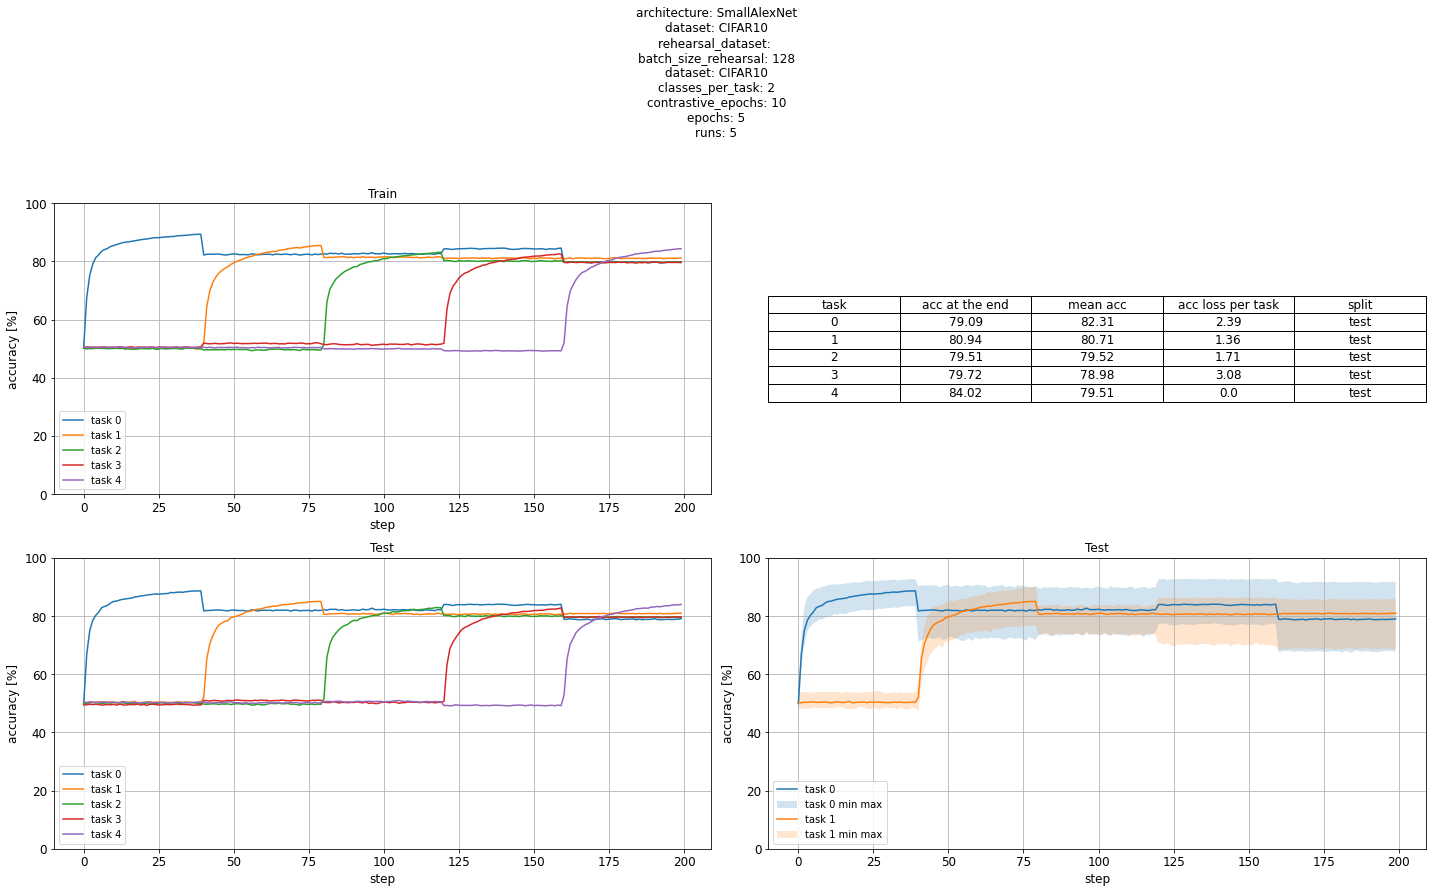

In [11]:
viz.y_min = 0
viz.plot_everything()